In [1]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import re
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset


from juliacall import Main as Main  # same name as before



c:\Users\Julia\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Julia\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
# Load MainD2 package
Main.seval('using Pkg; Pkg.activate("D:/DTU/OR/VS_codes/FCB")')
Main.seval("using JLD2")

  Activating project at `D:\DTU\OR\VS_codes\FCB`


Loading the plotting library

In [3]:
#include python file plotting_functions.py 
import importlib, plotting_functions as pf
importlib.reload(pf)

<module 'plotting_functions' from 'd:\\DTU\\OR\\VS_codes\\Full-cost-balancing\\plotting_functions.py'>

Colour palette

In [4]:
type_colors = {
    "Deviators":  "#EE7518",  # Muted orange
    "Flexibles":  "#08306b",  # Blue-teal
    "Base loads": "#2E8B57",  # Green
}

# Use this for a more professional, cohesive look
tech_colors = {
    "On_0.05":  "#EE7518",  # good
    "On_0.125": "#C85700",  # mid
    "On_0.25":  "#EA985A",  # bad
    "Off_0.05": "#EE6318",  # good
    "Off_0.125":"#A33B03",  # mid
    "Off_0.25": "#893406",  # bad
    "SCGT":     "#3f8fc4", # Deep Night Teal (From your preferred set)
    "CCGT":     "#08306b",  # Blue-teal
    "Extra_blue": "#2257a5", # Dark Blue
    "Biomass":  "#4CCA53",  # Green
    "Coal":     "#2E6F40",  # Dark green
    "Waste":    "#388E3C", # Forest Green (The "Waste" green you need)
}

Tech_colors_reg = {
    "On":   "#C85700", # Soft Orange
    "Off": "#EE6318", # Teal
    "SCGT":     "#3f8fc4", # Deep Night Teal (From your preferred set)
    "CCGT":     "#08306b",  # Blue-teal
    "Extra_blue": "#2257a5", # Dark Blue
    "Biomass":  "#4CCA53",  # Green
    "Coal":     "#2E6F40",  # Dark green
    "Waste":    "#388E3C", # Forest Green (The "Waste" green you need)
}


##### Penalty check: conv. & time

In [5]:
data_pen = Main.seval('JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/export_HPC/penalty_test_all_folds_27537286.jld2", "data")')
display(data_pen)

Dict{String, Any} with 10 entries:
  "GDCA"        => Any[(profits = (pol_in = [[2325.96, 169.372, -0.0, -27.6129]…
  "penalty"     => 100:100:2000
  "iter_bin_LP" => Any[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3,…
  "time_taken"  => Any[896.181, 634.011, 389.185, 651.423, 380.094, 648.472, 42…
  "obj_bin"     => Any[[1.05946e5, 1.05669e5, 1.05246e5, 1.0617e5, 1.05383e5, 1…
  "iter_bin"    => Any[[3, 5, 8, 6, 3, 22, 17, 124, 33, 19], [3, 4, 3, 9, 19, 1…
  "q_down"      => 480.0
  "BM"          => Any[(profits = (pol_in = [[2325.96, 169.372, -0.0, -0.0] [23…
  "obj_bin_LP"  => Any[[1.05946e5, 1.05669e5, 1.05246e5, 1.0617e5, 1.05383e5, 1…
  "q_up"        => 560.0

In [ ]:
data_pen = Main.seval('JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/export_HPC/penalty_test_all_folds_27537286.jld2", "data")')

A = np.vstack(data_pen["iter_bin"])      # shape: (n_rows, n_cols)
print(A)
iter_bin_avg = A.mean(axis=1)
iter_bin_std = A.std(axis=1)
iter_max = A.max(axis=1)
iter_min = A.min(axis=1)
fold_mean = A.mean(axis=0)
print(fold_mean)

print(iter_max)
print(iter_min)
print(iter_bin_avg)

B = np.vstack(data_pen["iter_bin_LP"])
iter_bin_LP_avg = B.mean(axis=1)
iter_bin_LP_std = B.std(axis=1)

#find mix of data_pen["time_taken"] and iter_bin_avg that has the smallest smallest values of both
time_taken = np.array(data_pen["time_taken"])

#normalize time values to find best penalty
norm_time = (time_taken - time_taken.min()) / (time_taken.max() - time_taken.min())
norm_iter = (iter_bin_avg - iter_bin_avg.min()) / (iter_bin_avg.max() - iter_bin_avg.min())
norm_combined = norm_time + norm_iter
best_index = np.argmin(norm_combined)

print("Best penalty index:", best_index)
print("Best penalty value:", data_pen["penalty"][best_index])

A = np.vstack(data_pen["iter_bin"])      # shape: (n_rows, n_cols)
iter_bin_avg = A.mean(axis=1)
iter_bin_std = A.std(axis=1)
iter_bin_p25 = np.percentile(A, 25, axis=1)
iter_bin_p75 = np.percentile(A, 75, axis=1)


B = np.vstack(data_pen["iter_bin_LP"])
iter_bin_LP_avg = B.mean(axis=1)
iter_bin_LP_std = B.std(axis=1)
print(iter_bin_avg)

display(data_pen["time_taken"])
#find mix of data_pen["time_taken"] and iter_bin_avg that has the smallest smallest values of both
time_taken = np.array(data_pen["time_taken"])
x = np.array(data_pen["penalty"])

#normalize time values to find best penalty
norm_time = (time_taken - time_taken.min()) / (time_taken.max() - time_taken.min())
norm_iter = (iter_bin_avg - iter_bin_avg.min()) / (iter_bin_avg.max() - iter_bin_avg.min())
norm_combined = norm_time + norm_iter
best_index = np.argmin(norm_combined)

print("Best penalty index:", best_index)
print("Best penalty value:", data_pen["penalty"][best_index])


#Objective function 
display(data_pen["obj_bin"])



[[  3   5   8   6   3  22  17 124  33  19]
 [  3   4   3   9  19  12  65  30  10   3]
 [  3  15   3  13   5  14  19   8   7   3]
 [  5   3   7  31  10  34  26  13   3  22]
 [  3   6   4  19   3   4  13   3  10  27]
 [  4   3  53  21   3  15  38   5  16   5]
 [  5   4  10  13   3  12   6  33   4  14]
 [ 20   4   8   7  10   6  15   5  21   5]
 [144  13  15   5  20  32   3   6  15   3]
 [  3   3  26   6  19   3   3   3   8   4]
 [  3   6   7  24   7   3  57   7  11  23]
 [ 55  13  22   8   3   6   3   5   4  10]
 [  8   4  10   3   8  12  47   6   7   8]
 [ 58  19  13  21   3  13  11   8   6   3]
 [  9   4   8   8   3  15  13  20  22  25]
 [  4   3   3   8   3   4 111  54   4  10]
 [  5   3  12  28  14  27  12  36  69  11]
 [  3   3  10  10   5  43  36  15  13  18]
 [  4   5   8  17   4  10   7  18   4  13]
 [  4  14  11  20  16  13  22  20  19  27]]
[17.3   6.7  12.05 13.85  8.05 15.   26.2  20.95 14.3  12.65]
[124  65  19  34  27  53  33  21 144  26  57  55  47  58  25 111  69  43
  18

20-element Vector{Any}:
  896.181074142456
  634.0110950469971
  389.1850161552429
  651.4225058555603
  380.09390211105347
  648.4723989963531
  428.1971700191498
  453.1682720184326
 1165.5749049186707
  316.38772416114807
  632.2135670185089
  630.0096580982208
  532.7489359378815
  631.839063167572
  500.0378370285034
  828.535994052887
  881.5699911117554
  644.7772388458252
  379.53560400009155
  708.2064189910889

Best penalty index: 9
Best penalty value: 1000


20-element Vector{Any}:
 [105946.16, 105668.77, 105246.48, 106169.59, 105383.17, 105328.8, 106556.2, 105696.41, 105973.81, 104904.97]
 [105946.16, 105668.77, 105246.48, 106169.59, 105383.17, 105328.8, 106556.2, 105696.41, 105973.81, 104904.97]
 [105946.16, 105668.77, 105246.48, 106169.59, 105383.17, 105328.8, 106556.2, 105696.41, 105973.81, 104904.97]
 [105946.16, 105668.77, 105246.48, 106169.59, 105383.17, 105328.8, 106556.2, 105696.41, 105973.81, 104904.97]
 [105946.16, 105668.77, 105246.48, 106169.59, 105383.17, 105328.8, 106556.2, 105696.41, 105973.81, 104904.97]
 [105946.16, 105668.77, 105246.48, 106169.59, 105383.17, 105328.8, 106556.2, 105696.41, 105973.81, 104904.97]
 [105946.16, 105668.77, 105246.48, 106169.59, 105383.17, 105328.8, 106556.2, 105696.41, 105973.81, 104904.97]
 [105946.16, 105668.77, 105246.48, 106169.59, 105383.17, 105328.8, 106556.2, 105696.41, 105973.81, 104904.97]
 [105946.16, 105668.77, 105246.48, 106169.59, 105383.17, 105328.8, 106556.2, 105696.41, 105973.8

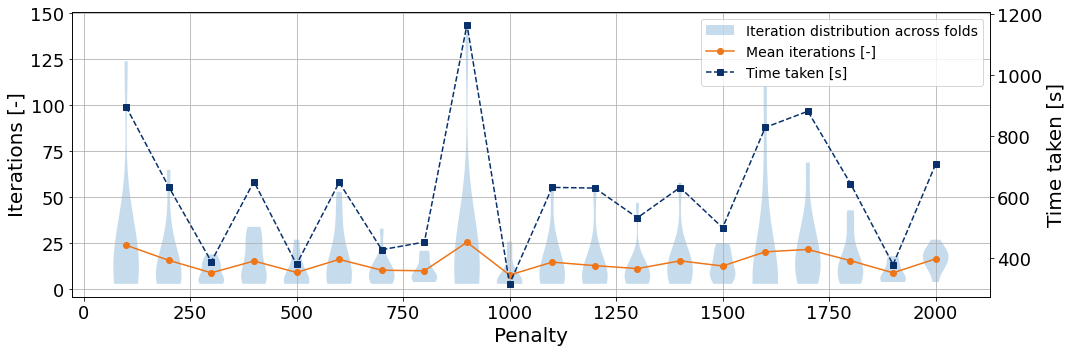

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 5))

# violins expect a list of 1D arrays (one per x)
data = [A[i, :] for i in range(A.shape[0])]

vp = ax1.violinplot(
    data,
    positions=x,
    widths=60,          # adjust if penalties are spaced by 100
    showmeans=False,
    showmedians=False,
    showextrema=False
)
vp["bodies"][1].set_label("Iteration distribution across folds")

# make violins subtle
for body in vp["bodies"]:
    body.set_alpha(0.25)
    body.set_edgecolor("none")

# overlay summary lines
ax1.plot(x, iter_bin_avg, marker="o", label="Mean iterations [-]", color="#EE7518")

ax1.set_xlabel("Penalty", fontsize=20)
ax1.set_ylabel("Iterations [-]", fontsize=20)
ax1.grid(True)
ax1.tick_params(axis="x", labelsize=18)
ax1.tick_params(axis="y", labelsize=18)

# second axis: time
ax2 = ax1.twinx()
ax2.plot(x, time_taken, marker="s", linestyle="--", label="Time taken [s]", color="#08306b")
ax2.set_ylabel("Time taken [s]", fontsize=20)
ax2.tick_params(axis="y", labelsize=18)

# combined legend (for both axes)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper right", fontsize=14)

#plt.tight_layout()
#plt.show()

#save as pdf to Plots folder
fig.savefig(f"../Figures/Results/Penalty_check.pdf", dpi=300)

#### Initial values check

In [ ]:
Main.seval('data_init = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/export_HPC/Init_val_final_27692642.jld2", "data")')
data_init = Main.seval('data_init')

In [ ]:
print("Expected bids and std - Deviators")
for i in range(12):
    print(data_init["mean_ppDA"][i], data_init["std_ppDA"][i])

print("Expected DA bids and std - Flexibles ")
for i in range(8):
    print(data_init["mean_pfDA"][i], data_init["std_pfDA"][i])

print("Expected DA bids and std - Regulars ")
for i in range(3):
    print(data_init["mean_pgDA"][i], data_init["std_pgDA"][i])


Expected bids and std - Deviators
32.76 0.0
32.76 0.0
32.76 0.0
32.76 0.0
32.76 0.0
32.76 0.0
52.42 0.0
52.42 0.0
52.42 0.0
52.42 0.0
52.42 0.0
52.42 0.0
Expected DA bids and std - Flexibles 
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
88.92 0.0
450.0 0.0
450.0 0.0
450.0 0.0
Expected DA bids and std - Regulars 
0.0 0.0
0.0 0.0
50.0 0.0


In [ ]:
print("Expected profits and std - Deviators")
for i in range(12):
    print(data_init["mean_profit_pol"][i], data_init["std_profit_pol"][i])

print("Expected profits and std - Flexibles ")
for i in range(8):
    print(data_init["mean_profit_flex"][i], data_init["std_profit_flex"][i])

print("Expected profits and std - Regulars ")
for i in range(3):
    print(data_init["mean_profit_reg"][i], data_init["std_profit_reg"][i])

Expected profits and std - Deviators
2467.72 0.0
2467.72 0.0
2467.72 0.0
2467.72 0.0
2467.72 0.0
2467.72 0.0
3807.92 0.0
3807.92 0.0
3807.92 0.0
3807.92 0.0
3807.92 0.0
3807.92 0.0
Expected profits and std - Flexibles 
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
Expected profits and std - Regulars 
-0.0 0.0
-0.0 0.0
2400.0 0.0


#### Values

In [6]:
markets_d = ["Day-ahead", "Balancing", "Penalty"]
markets_f = ["Day-ahead", "Balancing", "Reserve"]
markets_bl = ["Day-ahead"]

model_names = ["Benchmark", "FCB"] #, "bigQ"]

#Deviators = [f"W_On_good{i}" for i in range(1, 3)] +[f"W_On_mid{i}" for i in range(1, 3)] +[f"W_On_bad{i}" for i in range(1, 3)]  + [f"W_Off_good{i}" for i in range(1, 3)] +[f"W_Off_mid{i}" for i in range(1, 3)] +[f"W_Off_bad{i}" for i in range(1, 3)] 
Deviators = (
    [rf"On{i}$_{{\gamma = 0.05}}$"  for i in range(1, 3)] +
    [rf"On{i}$_{{\gamma = 0.125}}$" for i in range(1, 3)] +
    [rf"On{i}$_{{\gamma = 0.25}}$"  for i in range(1, 3)] +
    [rf"Off{i}$_{{\gamma = 0.05}}$" for i in range(1, 3)] +
    [rf"Off{i}$_{{\gamma = 0.125}}$"for i in range(1, 3)] +
    [rf"Off{i}$_{{\gamma = 0.25}}$" for i in range(1, 3)]
)

Deviators_reg = (
    [f"On$_{{{i}}}$" for i in range(1, 7)] +
    [f"Off$_{{{i}}}$" for i in range(1, 7)]
)

Flexibles = [f"SCGT{i}" for i in range(1, 5)] + [ f"CCGT{i}" for i in range(1,5)] # Example names for 5 flexibles
Base_loads= ["Biomass", "Coal", "Waste"] 
nP = len(Deviators)
nF = len(Flexibles)
nR = len(Base_loads)
grad = cm.viridis  # or any colormap
bar_colors = [grad(i/(nP-1)) for i in range(nP)]

tech_by_type = {
    "Deviators":  ["Onshore", "Offshore"],
    "Flexibles":  ["SCGT", "CCGT"],
    "Base loads": ["Biomass", "Coal", "Waste"],
}


names_by_type = {
    "Deviators": Deviators,
    "Flexibles": Flexibles,
    "Base loads": Base_loads,
}

names_by_type_reg = {
    "Deviators": Deviators_reg,
    "Flexibles": Flexibles,
    "Base loads": Base_loads,
}

bar_color = type_colors["Flexibles"]  # "#08306b"
AllTechs = Deviators + Flexibles + Base_loads

### Computer results

In [7]:
# Load the file Base case and BigQ
Main.seval('data_BM = JLD2.load("export/data_BM.jld2", "data_BM")')
Main.seval('data_asy_BM = JLD2.load("export/data_asy_forecast_BM.jld2", "data_asy_forecast_BM")')
Main.seval('data_asy_GDCA = JLD2.load("export/data_asy_forecast_GDCA.jld2", "data_asy_forecast_GDCA")')
Main.seval('data_bin = JLD2.load("export/data_bin.jld2", "data_bin")')
Main.seval('R_bids = JLD2.load("export/reserve_bids.jld2", "R_bids")')
#Main.seval('data_bigQ = JLD2.load("export/data_bin_bigQ.jld2", "data_bin_bigQ")')

# Access it in Python
data_BM = Main.data_BM
data_asy_BM = Main.data_asy_BM
data_asy_GDCA = Main.data_asy_GDCA
data_bin = Main.data_bin

R_bids = Main.R_bids
rf_up = R_bids[0]
rf_down = R_bids[1]


Constants = np.load("export/Constants.npz")
q_up = Constants["q_up"]
q_down = Constants["q_down"]
NI_up = Constants["NI_up"]
NI_down = Constants["NI_down"]
Cp = Constants["Cp"]
Cf = Constants["Cf"]
Cr = Constants["Cr"]
Cf_Rup = Constants["Cf_Rup"]
Cf_Rdown = Constants["Cf_Rdown"]

nS_in_sample = len(data_BM["split_info"]["in_sample_Pw"][0][:, 0])
nS_out_sample = len(data_BM["split_info"]["out_sample_Pw"][0][:, 0])


DA bids

In [8]:
DA_bids_FCB = {
    "FCB":{
        "Deviators": data_bin["aggregates"]["mean_pol_DA_bids_out"],
        "Flexibles":  data_bin["aggregates"]["mean_flex_DA_bids_out"],
        "Base loads":   data_bin["aggregates"]["mean_reg_DA_bids_out"]
    },

    "FCB_assymetric": {
        "Deviators": data_asy_GDCA["aggregates"]["mean_pol_DA_bids_out"],
        "Flexibles":  data_asy_GDCA["aggregates"]["mean_flex_DA_bids_out"],
        "Base loads":   data_asy_GDCA["aggregates"]["mean_reg_DA_bids_out"]
    },
}

DA_bids_pol = {
    "Benchmark": {
        "polluters": data_BM["aggregates"]["mean_pol_DA_bids_out"]
    },
    "FCB": {
        "polluters": data_asy_GDCA["aggregates"]["mean_pol_DA_bids_out"]
    },
}



Balancing bids

In [9]:
deviations_list = [
    np.asarray(data_bin["aggregates"]["mean_pol_bids_out"]).ravel(),
    np.asarray(data_asy_GDCA["aggregates"]["mean_pol_bids_out"]).ravel(),
    #np.asarray(data_bin_bigQ["aggregates"]["mean_pol_bids_out"]).ravel(),
]

deviations_up_list = [
    np.asarray(data_bin["aggregates"]["mean_pol_bids_up_out"]).ravel(), 
    np.asarray(data_asy_GDCA["aggregates"]["mean_pol_bids_up_out"]).ravel()
    ]   # nP x 1 or nP

deviations_down_list = [
    np.asarray(data_bin["aggregates"]["mean_pol_bids_down_out"]).ravel(), 
    np.asarray(data_asy_GDCA["aggregates"]["mean_pol_bids_down_out"]).ravel()
    ]

dev_all_list = [
    np.asarray(data_bin["aggregates"]["mean_pol_bids_out"]).ravel(),
    np.asarray(data_asy_GDCA["aggregates"]["mean_pol_bids_out"]).ravel(),
    #np.asarray(data_bin_bigQ["aggregates"]["mean_pol_bids_out"]).ravel(),
    np.asarray(data_bin["aggregates"]["mean_flex_bids_up_out"]).ravel(),
    np.asarray(data_asy_GDCA["aggregates"]["mean_flex_bids_up_out"]).ravel(),
]

Profits

In [10]:
pBIN_list = [
    data_bin["aggregates"]["pol_out_avg"], 
    data_asy_GDCA["aggregates"]["pol_out_avg"]
]#, data_bin_bigQ["aggregates"]["pol_out_avg"]]  # nP x ≥4 arrays


#profits for stacking plot per generator type
#Deviators
# sum columns 2 and 3 (zero-indexed)
pBM_dev = np.column_stack([data_bin["aggregates"]["pol_out_avg"][:, 0], data_bin["aggregates"]["pol_out_avg"][:, 1], data_bin["aggregates"]["pol_out_avg"][:, 2] + data_bin["aggregates"]["pol_out_avg"][:, 3]])
pBIN_dev = np.column_stack([data_asy_GDCA["aggregates"]["pol_out_avg"][:, 0], data_asy_GDCA["aggregates"]["pol_out_avg"][:, 1], data_asy_GDCA["aggregates"]["pol_out_avg"][:, 2] + data_asy_GDCA["aggregates"]["pol_out_avg"][:, 3]])
#pBIN_bigQ_dev = np.column_stack([data_bin_bigQ["aggregates"]["pol_out_avg"][:, 0], data_bin_bigQ["aggregates"]["pol_out_avg"][:, 1], data_bin_bigQ["aggregates"]["pol_out_avg"][:, 2] + data_bin_bigQ["aggregates"]["pol_out_avg"][:, 3]])


#Flexibles
# sum columns 2 and 3 (zero-indexed)
pBM_flex = np.column_stack([data_asy_BM["aggregates"]["flex_out_avg"][:, 0], data_asy_BM["aggregates"]["flex_out_avg"][:, 1], data_asy_BM["aggregates"]["flex_out_avg"][:, 2] ])
pBIN_flex = np.column_stack([data_asy_GDCA["aggregates"]["flex_out_avg"][:, 0], data_asy_GDCA["aggregates"]["flex_out_avg"][:, 1], data_asy_GDCA["aggregates"]["flex_out_avg"][:, 2] ])
   

#Base loads
pBM_base = np.column_stack([data_asy_BM["aggregates"]["reg_out_avg"][:, 0]])
pBIN_base = np.column_stack([data_asy_GDCA["aggregates"]["reg_out_avg"][:, 0]])
#pBIN_bigQ_base = np.column_stack([data_bin_bigQ["aggregates"]["reg_out_avg"][:, 0]])


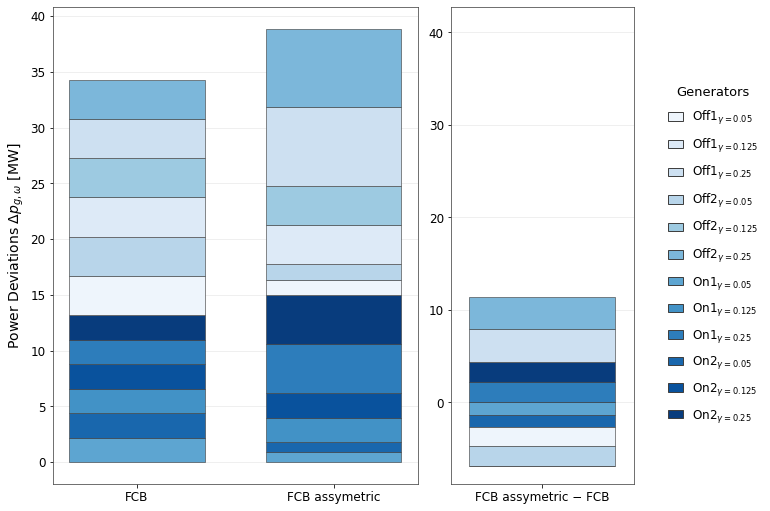

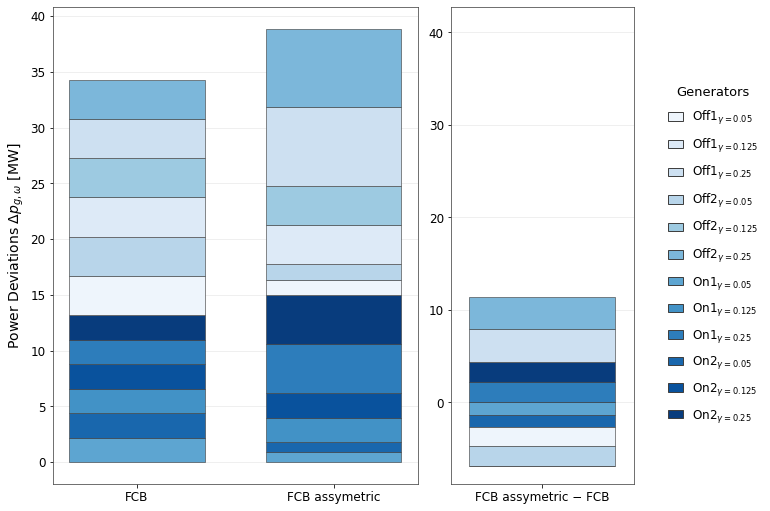

In [ ]:
model_names = ["FCB", "FCB assymetric"]
pf.plot_power_deviations_models(model_names, deviations_list, Deviators, show_arrows=False)

['On1$_{\\gamma = 0.05}$', 'On2$_{\\gamma = 0.05}$', 'On1$_{\\gamma = 0.125}$', 'On2$_{\\gamma = 0.125}$', 'On1$_{\\gamma = 0.25}$', 'On2$_{\\gamma = 0.25}$', 'Off1$_{\\gamma = 0.05}$', 'Off2$_{\\gamma = 0.05}$', 'Off1$_{\\gamma = 0.125}$', 'Off2$_{\\gamma = 0.125}$', 'Off1$_{\\gamma = 0.25}$', 'Off2$_{\\gamma = 0.25}$']
['SCGT1', 'SCGT2', 'SCGT3', 'SCGT4', 'CCGT1', 'CCGT2', 'CCGT3', 'CCGT4']
['Biomass', 'Coal', 'Waste']


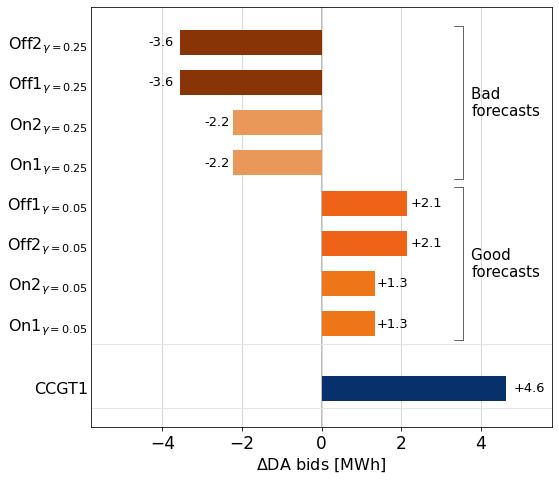

In [12]:
diff_DA_fig = pf.plot_DA_bid_difference_one_color_from_nested_dict(
    DA_bids=DA_bids_FCB,
    generators_by_type=names_by_type,
    model_names=( "FCB", "FCB_assymetric"),
    tech_colors=tech_colors,
    sort_by="abs", asy = True,
    figsize=(10, 8), 
    title = ""
)
#diff_DA_fig.savefig("../Figures/Results/diff_DA_fig_asy.pdf")

In [14]:
def costs_per_fold(fold, nS, nP, nF, nR, prob_all, DA_bids, B_bids_pol, B_pol_expected, 
                   B_bids_flex, R_bids, Cf_Rup, Cf_Rdown, Q_up=None, Q_down=None, tol=1e-6):
    # This is for 1 fold
    # B_bids corresponds to the up [0] and down [0] bids that are contributing to the system imbalance
    pol_cost = [None] * nP
    flex_cost = [None] * nF
    reg_cost = [None] * nR

    include_penalty = Q_up is not None and Q_down is not None
    prob = prob_all[fold]
    
    k_up = np.zeros((nS, nP))
    k_down = np.zeros((nS, nP))

    # --- imbalance shares ---
    for w in range(nS):
        total_imbalance = np.sum(B_bids_pol[fold][0][w, :]) + np.sum(B_bids_pol[fold][1][w, :]) # SUM OF UP AND DOWN REGULATION DEVIATIONS FOR THIS SCENARIO
        z_down = np.sum(B_bids_pol[fold][1][w, :]) # DOWN REGULATION
        z_up = np.sum(B_bids_pol[fold][0][w, :])  # UP REGULATION

        for p in range(nP):
            bid_up = B_bids_pol[fold][0][w, p]
            bid_down = B_bids_pol[fold][1][w, p]

            if total_imbalance > tol and bid_down > 0:
                k_down[w, p] = bid_down / z_down
            elif total_imbalance < -tol and bid_up < 0:
                k_up[w, p] = bid_up / z_up

    # --- polluters ---
    for p in range(nP):
        cost_DA = DA_bids[fold][0][p] * Cp[p]
        cost_B = Cp[p]*B_pol_expected[p, fold]
        penalty_up = np.sum(prob[w] * Q_up * k_up[w, p] for w in range(nS)) if include_penalty else 0.0
        penalty_down = np.sum(prob[w] * Q_down * k_down[w, p] for w in range(nS)) if include_penalty else 0.0

        pol_cost[p] = [cost_DA, cost_B, penalty_up, penalty_down]


    # --- flexible units ---
    for f in range(nF):
        cost_DA = DA_bids[fold][1][f] * Cf[f]
        cost_B = Cf[f] * (B_bids_flex[0][f, fold] - B_bids_flex[1][f, fold])               # IT SHOULD BE FIRST UP [0] THEN  DOWN [0] BUT THE VALUES ARE SWAPPED FOR NOW
        cost_R = (
            R_bids[0][f] * Cf_Rup[f]
            + R_bids[1][f] * Cf_Rdown[f])
        cost_R = 0
        flex_cost[f] = [cost_DA, cost_B, cost_R]

    # --- regular generators ---
    for r in range(nR):
        cost_DA = DA_bids[fold][2][r] * Cr[r]
        reg_cost[r] = [cost_DA]

    return pol_cost, flex_cost, reg_cost

In [15]:
systems_costs_BM_in = []
systems_costs_BM_out = []
systems_costs_FCB_in =[]
systems_costs_FCB_out =[]

prob_insample = data_asy_GDCA["split_info"]["in_sample_prob"]
prob_outsample = data_asy_GDCA["split_info"]["out_sample_prob"]

for fold in range (10):
    flex_bids_insample = [data_asy_GDCA["bids"]["B_flex_up_in"], data_asy_GDCA["bids"]["B_flex_down_in"]]
    pol_cost, flex_cost, reg_cost = costs_per_fold(fold, nS_in_sample, nP, nF, nR, prob_insample, data_asy_GDCA["bids"]["DA_bids_insample"], data_asy_GDCA["bids"]["B_bids_all_insample"], data_asy_GDCA["bids"]["B_pol_in"], flex_bids_insample, R_bids, Cf_Rup, Cf_Rdown, Q_up=q_up, Q_down=q_down, tol=1e-6)
    systems_costs_BM_in.append({"pol": pol_cost, "flex": flex_cost, "reg": reg_cost})

    flex_bids_outsample = [data_asy_GDCA["bids"]["B_flex_up_out"], data_asy_GDCA["bids"]["B_flex_down_out"]]
    pol_cost, flex_cost, reg_cost = costs_per_fold(fold, nS_out_sample, nP, nF, nR, prob_outsample, data_asy_GDCA["bids"]["DA_bids_outsample"], data_asy_GDCA["bids"]["B_bids_all_outsample"], data_asy_GDCA["bids"]["B_pol_out"], flex_bids_outsample, R_bids, Cf_Rup, Cf_Rdown, Q_up=q_up, Q_down=q_down, tol=1e-6)
    systems_costs_BM_out.append({"pol": pol_cost, "flex": flex_cost, "reg": reg_cost})

    flex_bids_insample = [data_bin["bids"]["B_flex_up_in"], data_bin["bids"]["B_flex_down_in"]]
    pol_cost, flex_cost, reg_cost = costs_per_fold(fold, nS_in_sample, nP, nF, nR, prob_insample, data_bin["bids"]["DA_bids_insample"], data_bin["bids"]["B_bids_all_insample"], data_bin["bids"]["B_pol_in"], flex_bids_insample, R_bids, Cf_Rup, Cf_Rdown, Q_up=q_up, Q_down=q_down, tol=1e-6)
    systems_costs_FCB_in.append({"pol": pol_cost, "flex": flex_cost, "reg": reg_cost})

    flex_bids_outsample = [data_bin["bids"]["B_flex_up_out"], data_bin["bids"]["B_flex_down_out"]]
    pol_cost, flex_cost, reg_cost = costs_per_fold(fold, nS_out_sample, nP, nF, nR, prob_outsample, data_bin["bids"]["DA_bids_outsample"], data_bin["bids"]["B_bids_all_outsample"], data_bin["bids"]["B_pol_out"], flex_bids_outsample, R_bids, Cf_Rup, Cf_Rdown, Q_up=q_up, Q_down=q_down, tol=1e-6)
    systems_costs_FCB_out.append({"pol": pol_cost, "flex": flex_cost, "reg": reg_cost})


C:\Users\Julia\AppData\Local\Temp/ipykernel_24624/3231613832.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  penalty_up = np.sum(prob[w] * Q_up * k_up[w, p] for w in range(nS)) if include_penalty else 0.0
C:\Users\Julia\AppData\Local\Temp/ipykernel_24624/3231613832.py:35: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  penalty_down = np.sum(prob[w] * Q_down * k_down[w, p] for w in range(nS)) if include_penalty else 0.0


total diff in :  0.20567613294010698
total diff out:  0.22288658865222716


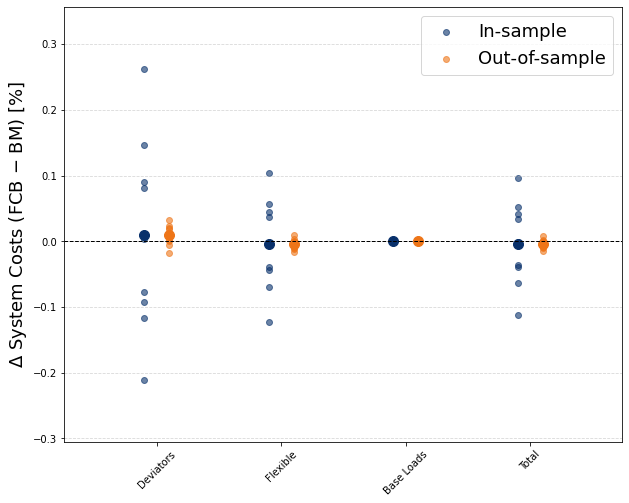

In [16]:
fig_systems_costs = pf.systems_costs(systems_costs_BM_in, systems_costs_BM_out, systems_costs_FCB_in, systems_costs_FCB_out)

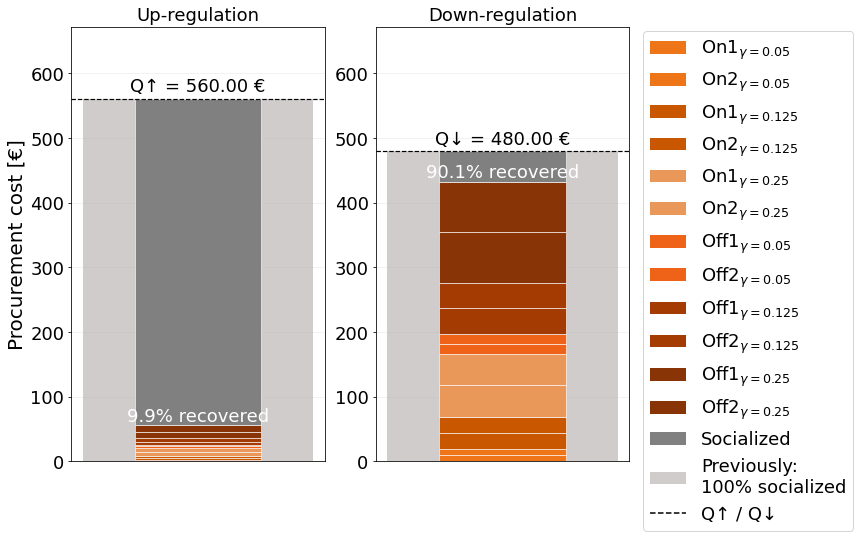

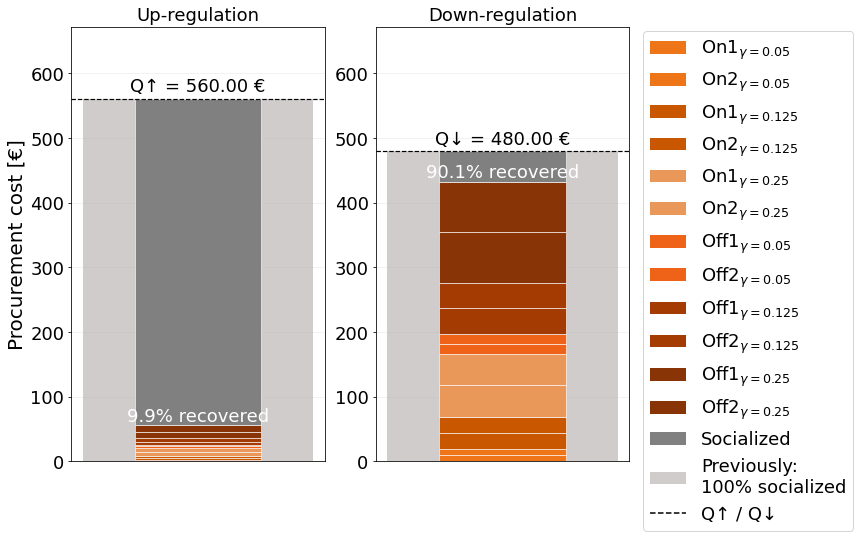

In [17]:
Q_up_list_asy = [q_up, q_up]
Q_down_list_asy = [q_down, q_down]
pf.plot_socialized_vs_individualized_FCB_only(
    pBIN_fcb=pBIN_list[1],      # assuming index 1 is FCB
    Q_up=Q_up_list_asy[1],
    Q_down=Q_down_list_asy[1],
    tech_colors=tech_colors,
    polluters=Deviators, 
    figsize=(10, 8),
    prev_social_color="#d0cccc",
    asy = True
)

In [18]:
profits_pol_in = data_asy_GDCA["profits"]["pol_in"]
profits_pol_out = data_asy_GDCA["profits"]["pol_out"]

# 1. Extract Penalty Up (3rd element in Julia)
Main.profits_matrix_in = profits_pol_in
penalty_up_in = Main.seval("""
    map(profits_matrix_in) do v
        # If v is a vector [p1, p2, p3, p4], grab index 3
        (v isa AbstractVector && length(v) >= 3) ? v[3] : 0.0
    end
""")

# 2. Extract Penalty Down (4th element in Julia)
penalty_down_in = Main.seval("""
    map(profits_matrix_in) do v
        (v isa AbstractVector && length(v) >= 4) ? v[4] : 0.0
    end
""")

# Repeat for Out-Sample
Main.profits_matrix_out = profits_pol_out
penalty_up_out = Main.seval("map(v -> (v isa AbstractVector && length(v) >= 3) ? v[3] : 0.0, profits_matrix_out)")
penalty_down_out = Main.seval("map(v -> (v isa AbstractVector && length(v) >= 4) ? v[4] : 0.0, profits_matrix_out)")

In [19]:
def collapse_pairs(matrix):
    """
    matrix: 12 x N
    returns: 6 x N
    """
    matrix = np.asarray(matrix)
    return np.vstack([
        matrix[0:2].mean(axis=0),
        matrix[2:4].mean(axis=0),
        matrix[4:6].mean(axis=0),
        matrix[6:8].mean(axis=0),
        matrix[8:10].mean(axis=0),
        matrix[10:12].mean(axis=0),
    ])

up_in_c   = collapse_pairs(penalty_up_in)
up_out_c  = collapse_pairs(penalty_up_out)
down_in_c = collapse_pairs(penalty_down_in)
down_out_c= collapse_pairs(penalty_down_out)

Deviators_collapsed = [
    r'On$1-2_{\gamma=0.05}$',
    r'On$1-2_{\gamma=0.125}$',
    r'On$1-2_{\gamma=0.25}$',
    r'Off$1-2_{\gamma=0.05}$',
    r'Of$1-2_{\gamma=0.125}$',
    r'Off$1-2_{\gamma=0.25}$',
]

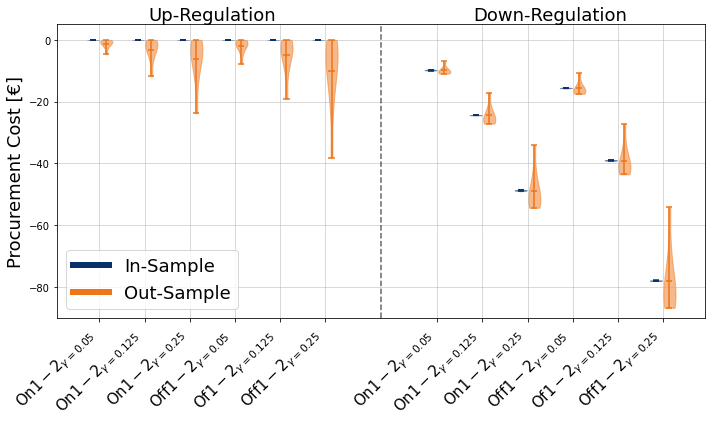

In [20]:
fig_asy_violins = pf.plot_penalty_violins_combined(
    up_in_c, up_out_c,
    down_in_c, down_out_c,
    Deviators_collapsed,
    ylim=(-90, 5)
)
#fig_asy_violins.savefig("../Figures/Results/penalty_violins_asy.pdf")

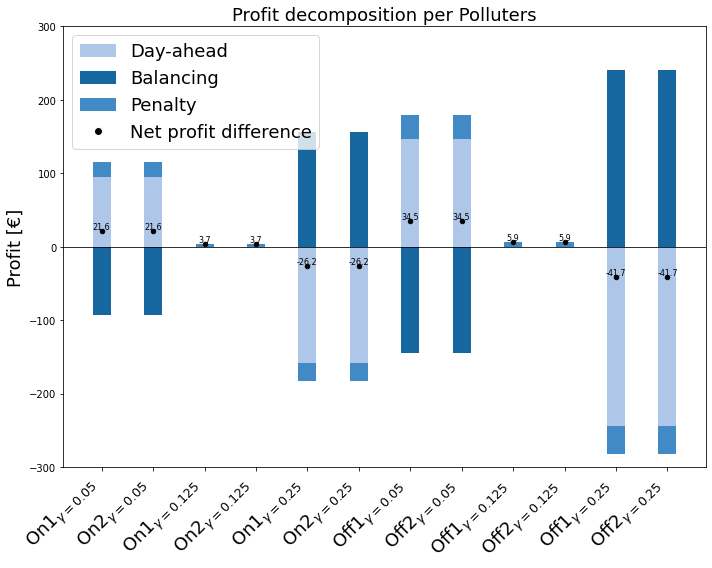

In [21]:
fig_prof_diff_asy = pf.stacked_posneg_diff_matrix(pBM_dev, pBIN_dev, Deviators, markets_d, participant_type="Polluters",
                               figsize=(10,8), labelsize=18, titlesize=18, fontsize=18)

#fig_prof_diff_asy.savefig("../Figures/Results/fig_profits_asy.pdf")

### Cf Check 

In [22]:
Main.seval('data_bigQ = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/export_HPC/Big_Q_27589024_new.jld2", "data")')
data_bigQ = Main.seval('data_bigQ')
display(data_bigQ)

Dict{String, Any} with 7 entries:
  "GDCA"            => (profits = (pol_in = [[2325.96, 169.372, -0.0, -59.828] …
  "penalty"         => 1000
  "q_down"          => 480.0
  "BM"              => (profits = (pol_in = [[2325.96, 169.372, -0.0, -0.0] [23…
  "iter_bin_all"    => [12, 102, 35, 103, 50, 61, 434, 6, 60, 4]
  "iter_bin_LP_all" => [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
  "q_up"            => 560.0

Handling the structure of the Cf

In [23]:
def nt_to_dict(x):
    """Recursively convert Julia NamedTuples (and structural arrays of them)
    to Python dicts, unwrapping singleton containers.
    """

    # Julia NamedTuple → dict
    if Main.isa(x, Main.NamedTuple):
        names = list(Main.propertynames(x))
        return {str(n): nt_to_dict(Main.getproperty(x, n)) for n in names}

    # Julia Tuple → Python tuple
    if Main.isa(x, Main.Tuple):
        return tuple(nt_to_dict(v) for v in list(x))

    # Julia Array
    if Main.isa(x, Main.AbstractArray):
        try:
            n = int(Main.length(x))
            if n == 0:
                return []

            # --- NEW: unwrap singleton containers more generally ---
            if n == 1:
                inner = x[0]

                # If singleton contains something "container-like", unwrap it
                # (this fixes Vector{Any}([ [..] ]) cases)
                if Main.isa(inner, Main.AbstractArray) or Main.isa(inner, Main.Tuple) or Main.isa(inner, Main.NamedTuple):
                    return nt_to_dict(inner)

                # If it's a Python list / sequence already, unwrap
                if hasattr(inner, "__len__") and not isinstance(inner, (str, bytes)):
                    return nt_to_dict(inner)

            first = x[0]

            # Structural array → convert elementwise
            if Main.isa(first, Main.NamedTuple) or Main.isa(first, Main.Tuple):
                converted = [nt_to_dict(v) for v in list(x)]
                return converted[0] if len(converted) == 1 else converted

        except Exception:
            pass

        # --- Optional but helpful: convert Julia numeric arrays to numpy ---
        # This makes them behave consistently in Python (vstack/mean/etc.)
        try:
            return np.array(x)
        except Exception:
            return x

    # Scalars / everything else
    return x


Our model

In [25]:
#Loading the data and checking for iteration counts

Main.seval('data_Cf_9 = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/Cf_HPC/Cf_9_final_27693416.jld2", "data")')
Main.seval('data_Cf_10 = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/Cf_HPC/Cf_10_final_27696845.jld2", "data")')
Main.seval('data_Cf_11 = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/Cf_HPC/Cf_11_final_27696846.jld2", "data")')
Main.seval('data_Cf_12 = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/Cf_HPC/Cf_12_final_27696847.jld2", "data")')
Main.seval('data_Cf_5_8 = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/Cf_HPC/Cf_5_8_27696842.jld2", "data")')


data_Cf_9 = Main.seval('data_Cf_9')
data_Cf_10 = Main.seval('data_Cf_10')
data_Cf_11 = Main.seval('data_Cf_11')
data_Cf_12 = Main.seval('data_Cf_12')
data_Cf_5_8 = Main.seval('data_Cf_5_8')

display(data_Cf_5_8["iter_bin_all"])
display(data_Cf_5_8["iter_bin_LP_all"])

res = [11,12]
#res= range(9,13)
for i in res:
    print(i)
    display(Main.seval(f'data_Cf_{i}["iter_bin_all"]'))
    display(Main.seval(f'data_Cf_{i}["iter_bin_LP_all"]'))

4-element Vector{Any}:
 [4, 6, 4, 4, 4, 4, 4, 6, 5, 4]
 [4, 4, 4, 4, 4, 4, 7, 4, 6, 4]
 [111, 13, 5, 4, 5, 13, 26, 29, 40, 12]
 [216, 9, 14, 129, 20, 229, 20, 65, 213, 38]

4-element Vector{Any}:
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

11


1-element Vector{Any}:
 [1000, 1000, 1000, 1000, 1000, 1000, 273, 1000, 1000, 1000]

1-element Vector{Any}:
 [5, 4, 6, 1000, 5, 5, 4, 8, 6, 7]

12


1-element Vector{Any}:
 [1000, 1000, 1000, 1000, 1000, 484, 615, 1000, 1000, 2]

1-element Vector{Any}:
 [6, 3, 6, 4, 4, 3, 4, 6, 1000, 2]

Checking only model Q7 and Q8 on top of the first half

K_constraint

In [26]:
#Loading the data and checking for iteration counts
Main.seval('data_Cf_9_k = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/Cf_HPC/SNB_9_k_max_27696849.jld2", "data")')
Main.seval('data_Cf_10_k = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/Cf_HPC/SNB_10_k_max_27696850.jld2", "data")')
Main.seval('data_Cf_11_k = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/Cf_HPC/SNB_11_k_max_27696851.jld2", "data")')
Main.seval('data_Cf_12_k = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/Cf_HPC/SNB_12_k_max_27696852.jld2", "data")')
Main.seval('data_Cf_5_8_k = JLD2.load("D:/DTU/OR/VS_codes/Full-cost-balancing/HPC/Cf_HPC/SNB_5_8_k_max_27696848.jld2", "data")')
data_Cf_9_k = Main.seval('data_Cf_9_k')
data_Cf_10_k = Main.seval('data_Cf_10_k')
data_Cf_11_k = Main.seval('data_Cf_11_k')
data_Cf_12_k = Main.seval('data_Cf_12_k')
data_Cf_5_8_k = Main.seval('data_Cf_5_8_k')

display(data_Cf_5_8_k["iter_bin_all"])
display(data_Cf_5_8_k["iter_bin_LP_all"])

res_k = range(9,13)
for i in res_k:
    print(i)
    display(Main.seval(f'data_Cf_{i}_k["iter_bin_all"]'))
    display(Main.seval(f'data_Cf_{i}_k["iter_bin_LP_all"]'))

4-element Vector{Any}:
 [4, 4, 6, 6, 4, 6, 4, 10, 13, 5]
 [5, 4, 8, 4, 4, 8, 4, 5, 7, 6]
 [5, 15, 47, 5, 8, 11, 7, 5, 9, 6]
 [3, 8, 8, 13, 7, 7, 14, 9, 13]

4-element Vector{Any}:
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 [3, 3, 3, 3, 3, 3, 3, 3, 4, 3]
 [3, 3, 5, 3, 4, 4, 3, 5, 4, 3]
 [3, 3, 3, 4, 3, 3, 3, 3, 3]

9


1-element Vector{Any}:
 [16, 133, 13, 365, 3, 4, 30, 69, 63, 15]

1-element Vector{Any}:
 [3, 3, 4, 3, 4, 3, 3, 3, 3, 3]

10


1-element Vector{Any}:
 [9, 37, 39, 204, 49, 16, 6, 95, 22, 26]

1-element Vector{Any}:
 [4, 3, 3, 3, 3, 3, 3, 3, 3, 3]

11


1-element Vector{Any}:
 [20, 19, 190, 161, 203, 3, 8, 143, 12, 10]

1-element Vector{Any}:
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

12


1-element Vector{Any}:
 [131, 33, 49, 145, 118, 26, 15, 29, 66, 52]

1-element Vector{Any}:
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Values

In [27]:
model_names_Cf =[f"Q$_{{{i}}}$" for i in range(1, 3)] + ["Q$_{FCB}$"] + [f"Q$_{{{i}}}$" for i in [4,7,8]] #+  [f"Q$_{{{i}}}$" for i in [8]] #+  [f"Q$_{{{i}}}$" for i in [7,8]] 
print(model_names_Cf)

model_names_Cf_k =[f"Q$_{{{i}}}$" for i in range(1, 3)] + ["Q$_{FCB}$"] + [f"Q$_{{{i}}}$" for i in range(4, 9)] #+  [f"Q$_{{{i}}}$" for i in [8]] #+  [f"Q$_{{{i}}}$" for i in [7,8]] 
print(model_names_Cf_k)

Q_down_list = [data_Cf_5_8["q_down"][i] for i in range(4)] + [ data_Cf_11["q_down"], data_Cf_12["q_down"]]
Q_up_list = [data_Cf_5_8["q_up"][i] for i in range(4)] + [ data_Cf_11["q_up"], data_Cf_12["q_up"]]

Q_down_list_k = [data_Cf_5_8_k["q_down"][i] for i in range(4)] + [data_Cf_9_k["q_down"], data_Cf_10_k["q_down"], data_Cf_11_k["q_down"], data_Cf_12_k["q_down"]]
Q_up_list_k = [data_Cf_5_8_k["q_up"][i] for i in range(4)] + [data_Cf_9_k["q_up"], data_Cf_10_k["q_up"], data_Cf_11_k["q_up"], data_Cf_12_k["q_up"]]

['Q$_{1}$', 'Q$_{2}$', 'Q$_{FCB}$', 'Q$_{4}$', 'Q$_{7}$', 'Q$_{8}$']
['Q$_{1}$', 'Q$_{2}$', 'Q$_{FCB}$', 'Q$_{4}$', 'Q$_{5}$', 'Q$_{6}$', 'Q$_{7}$', 'Q$_{8}$']


In [28]:
gdca_runs = data_Cf_5_8["GDCA"]   # Vector{NamedTuple}
BM_runs = data_Cf_5_8["BM"]     # Vector{NamedTuple}
gdca_run_k = data_Cf_5_8_k["GDCA"]   # Vector{NamedTuple}
BM_run_k = data_Cf_5_8_k["BM"]     # Vector{NamedTuple
R_Cf_GDCA = {}
R_Cf_BM = {}
R_Cf_GDCA_k = {}
R_Cf_BM_k = {}

for i in range(len(gdca_runs)):             # Python 0..n-1
    if Main.isassigned(gdca_runs, i+1):     # Julia 1..n
        R_Cf_GDCA[i+1] = nt_to_dict(gdca_runs[i])  # key is the ORIGINAL slot number
        R_Cf_BM[i+1] = nt_to_dict(BM_runs[i])  # key is the ORIGINAL slot number
        R_Cf_GDCA_k[i+1] = nt_to_dict(gdca_run_k[i])  # key is the ORIGINAL slot number
        R_Cf_BM_k[i+1] = nt_to_dict(BM_run_k[i])  # key is the ORIGINAL slot number

for (i,n) in enumerate(res):
    R_Cf_GDCA[5+i] = nt_to_dict(Main.seval(f'data_Cf_{n}["GDCA"]'))
    R_Cf_BM[5+i] = nt_to_dict(Main.seval(f'data_Cf_{n}["BM"]'))

for (i,n) in enumerate(res_k):
    R_Cf_GDCA_k[5+i] = nt_to_dict(Main.seval(f'data_Cf_{n}_k["GDCA"]'))
    R_Cf_BM_k[5+i] = nt_to_dict(Main.seval(f'data_Cf_{n}_k["BM"]'))


In [29]:
for j in range(10):
   print(" Final status:", R_Cf_GDCA_k[4]["history"]["history_insample"][j]['status'])



 Final status: ok
 Final status: ok
 Final status: ok
 Final status: ok
 Final status: ok
 Final status: ok
 Final status: ok
 Final status: ok
 Final status: failed
 Final status: ok


In [30]:
n_models_us = len(R_Cf_GDCA)
n_models_k = len(R_Cf_GDCA_k)
print("Number of models (us):", n_models_us)
print("Number of models (k):", n_models_k)


Number of models (us): 6
Number of models (k): 8


In [31]:
for i in range(1, n_models_k+1):
    if i <=4:
        print(np.round(R_Cf_GDCA[i]["history"]["history_insample"][6][1]['obj']),np.round(R_Cf_GDCA_k[i]["history"]["history_insample"][6]['h'][1]['obj_sans_imbalance']))
    elif i in [5,6]:
            print(np.round(R_Cf_GDCA_k[i]["history"]["history_insample"][6]['h'][1]['obj_sans_imbalance']))
    else:
        print(np.round(R_Cf_GDCA[i-2]["history"]["history_insample"][6][1]['obj']),np.round(R_Cf_GDCA_k[i]["history"]["history_insample"][6]['h'][1]['obj_sans_imbalance']))

106269.0 106269.0
106412.0 106412.0
106556.0 106556.0
106700.0 106700.0
106775.0
106847.0
106919.0 106919.0
106992.0 106992.0


Getting DA bids for the chosen folds

In [32]:
keep=[6]

def DA_bids_for_folds(model, keep, n_models):
    DA_bids_folds = []
    for j in range(1, n_models + 1):  # For each of your 6 dictionary-like objects
        current_data = model[j]["bids"]["DA_bids_outsample"]
        
        # 1. Calculate the element-wise means for this specific dictionary
        # current_data[keep[0]] and [keep[1]] are Julia sub-vectors
        temp_means = []
        for i in range(len(current_data[keep[0]])):
            v1 = current_data[keep[0]][i]
            #v2 = current_data[keep[1]][i]
            
            # Element-wise average
            avg_sub_vector = v1 # [(a + b) / 2 for a, b in zip(v1, v2)]
            temp_means.append(avg_sub_vector)
        
        # 2. Format the data using your 'make_entry' logic
        # Here idx is replaced by our temporary calculation 'temp_means'
        entry = {
            "Source_ID": j,
            "Deviators":  temp_means[0],  # The 12-element vector
            "Flexibles":  temp_means[1],  # The 8-element vector
            "Base loads": temp_means[2],  # The 3-element vector
        }
        
        DA_bids_folds.append(entry)
    return DA_bids_folds

DA_bids = DA_bids_for_folds(R_Cf_GDCA, keep, n_models_us)
DA_bids_k = DA_bids_for_folds(R_Cf_GDCA_k, keep, n_models_k)

In [33]:
run_to_Q = {
    1: 1,
    2: 2,
    4: 4,
    5: 7,
    6: 8,

}

run_to_Q_k = {
    1: 1,
    2: 2,
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8,
}

FCB_run = 3
 
def make_entry(DA_bids, idx):
    return {
        "Deviators":  DA_bids[idx-1]["Deviators"],
        "Flexibles": DA_bids[idx-1]["Flexibles"],
        "Base loads": DA_bids[idx-1]["Base loads"],
    }
"""
def make_entry(idx):
    return {
        "Deviators":  R_Cf_GDCA[idx]["aggregates"]["mean_pol_DA_bids_out"],
        "Flexibles": R_Cf_GDCA[idx]["aggregates"]["mean_flex_DA_bids_out"],
        "Base loads": R_Cf_GDCA[idx]["aggregates"]["mean_reg_DA_bids_out"],
    }
"""
order = [1, 2, "FCB", 4,7,8]
order_k = [1, 2, "FCB", 4,5,6,7,8]

# invert mapping: Q -> run_idx
Q_to_run = {Q: run for run, Q in run_to_Q.items()}
Q_to_run_k = {Q: run for run, Q in run_to_Q_k.items()}

DA_bids_Q = {}
DA_bids_Q_k = {}
for item in order:
    if item == "FCB":
        DA_bids_Q["Q$_{FCB}$"] = make_entry(DA_bids, FCB_run)
    else:
        DA_bids_Q[f"Q$_{item}$"] = make_entry(DA_bids, Q_to_run[item])
        
for item in order_k:
    if item == "FCB":
        DA_bids_Q_k["Q$_{FCB}$"] = make_entry(DA_bids_k, FCB_run)
    else:
        DA_bids_Q_k[f"Q$_{item}$"] = make_entry(DA_bids_k, Q_to_run_k[item])



Getting Balancing bids for the chosen folds

In [34]:
def B_bids_insample_dev(model, keep, nModels):
    
    B_bids_insample_dev = []

    for j in range(1, nModels + 1):  # Iterating through your 6 dictionary-like objects
        # Access the specific data and probability containers
        data_bids = model[j]["bids"]["B_bids_all_insample"]
        prob_container = model[j]["split_info"]["in_sample_prob"]
        
        # --- FOLD 1 (Index 2) ---
        idx1 = keep[0]
        p1 = np.array(prob_container[idx1]) # 10 probabilities
        # up1/down1 are 10x12 matrices
        up1, down1 = np.array(data_bids[idx1][0]), np.array(data_bids[idx1][1])
        
        # Weighted average: (1x10) @ (10x12) = (1x12)
        res_up1 = p1 @ up1
        res_down1 = p1 @ down1

      
        # --- COMBINE FOLDS ---
        # Average the weighted results of the two folds
        avg_up = res_up1 #+ res_up2) / 2
        avg_down = res_down1 #+ res_down2) / 2
        avg_total = avg_up + avg_down

        # Create the entry for your table
        entry = {
            "Source_ID": j,
            "Deviators_Up": avg_up,     # 12-element vector
            "Deviators_Down": avg_down, # 12-element vector
            "Deviators_Sum": avg_total   # 12-element vector
        }
        
        B_bids_insample_dev.append(entry)

    return B_bids_insample_dev

B_bids_dev = B_bids_insample_dev(R_Cf_GDCA, keep, n_models_us)
B_bids_dev_k = B_bids_insample_dev(R_Cf_GDCA_k, keep, n_models_k)

In [35]:
print("B bids Deviators FCB:")
for entry in B_bids_dev_k:
    print(f"Source_ID: {entry['Source_ID']}")
    print("Deviators Up:", entry["Deviators_Up"])
    print("Deviators Down:", entry["Deviators_Down"])
    print("Deviators Sum:", entry["Deviators_Sum"])
    print()

B bids Deviators FCB:
Source_ID: 1
Deviators Up: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Deviators Down: [1.02141599 1.02141599 1.02141599 1.02141599 1.02141599 1.02141599
 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345]
Deviators Sum: [1.02141599 1.02141599 1.02141599 1.02141599 1.02141599 1.02141599
 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345]

Source_ID: 2
Deviators Up: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Deviators Down: [1.02141599 1.02141599 1.02141599 1.02141599 1.02141599 1.02141599
 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345]
Deviators Sum: [1.02141599 1.02141599 1.02141599 1.02141599 1.02141599 1.02141599
 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345]

Source_ID: 3
Deviators Up: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Deviators Down: [1.02141599 1.02141599 1.02141599 1.02141599 1.02141599 1.02141599
 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345]
Deviators Sum: [1.02141599 1

In [36]:
dev_Q_list = (
    [
        np.asarray(entry["Deviators_Sum"]).ravel() 
        for entry in B_bids_dev
    ]
)

dev_Q_list_k = (
    [
        np.asarray(entry["Deviators_Sum"]).ravel() 
        for entry in B_bids_dev_k
    ]
)

Profits of the chosen folds

Plotting deviations for model: 400.0
[0.94501187 0.94501187 0.94501187 0.94501187 0.94501187 0.94501187
 1.51343756 1.51343756 1.51343756 1.51343756 1.51343756 1.51343756]
Plotting deviations for model: 480.0
[0.94501187 0.94501187 0.94501187 0.94501187 0.94501187 0.94501187
 1.51343756 1.51343756 1.51343756 1.51343756 1.51343756 1.51343756]
Plotting deviations for model: 560.0
[0.94501187 0.94501187 0.94501187 0.94501187 0.94501187 0.94501187
 1.51343756 1.51343756 1.51343756 1.51343756 1.51343756 1.51343756]
Plotting deviations for model: 640.0
[0.94501187 0.94501187 0.94501187 0.94501187 0.94501187 0.94501187
 1.51343756 1.51343756 1.51343756 1.51343756 1.51343756 1.51343756]
Plotting deviations for model: 880.0
[ 0.00000000e+00  0.00000000e+00 -6.36567386e-01 -3.84177716e-02
 -4.17499505e-01 -3.84177716e-02 -5.13550366e-01  0.00000000e+00
  0.00000000e+00 -6.26815753e-02 -6.70615476e-01 -4.07180131e+01]
Plotting deviations for model: 960.0
[  0.           0.           0.         -5

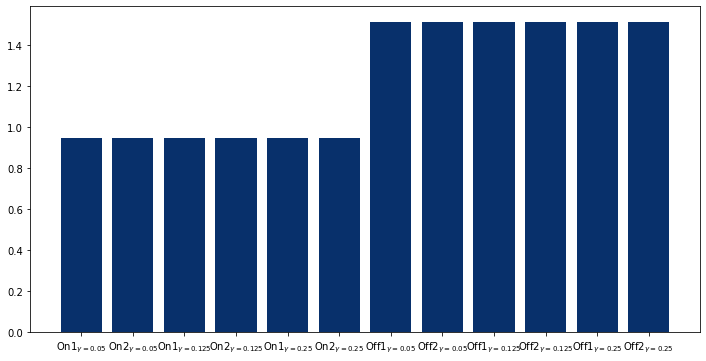

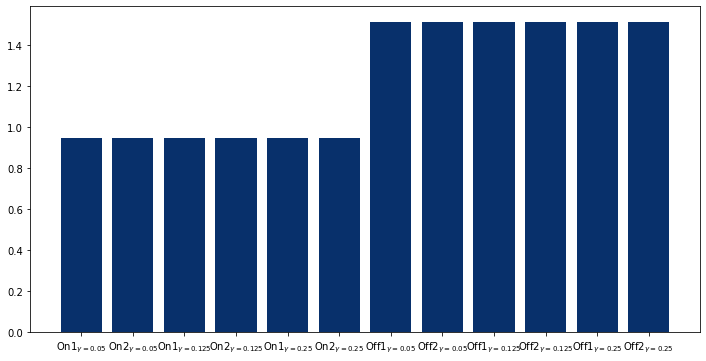

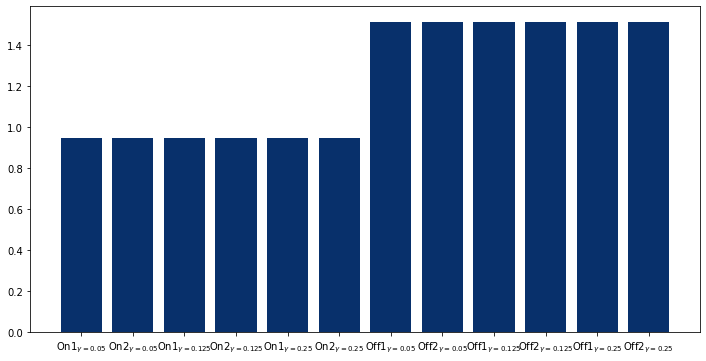

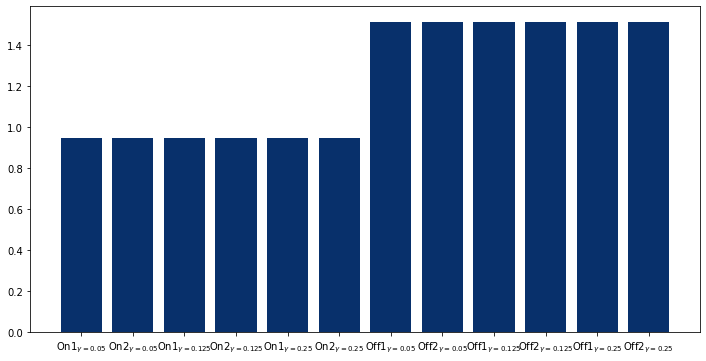

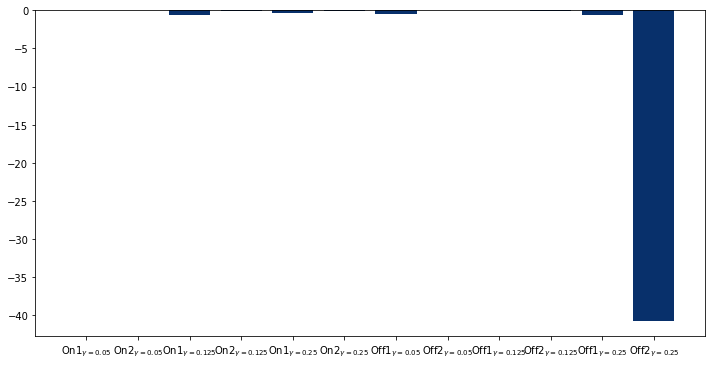

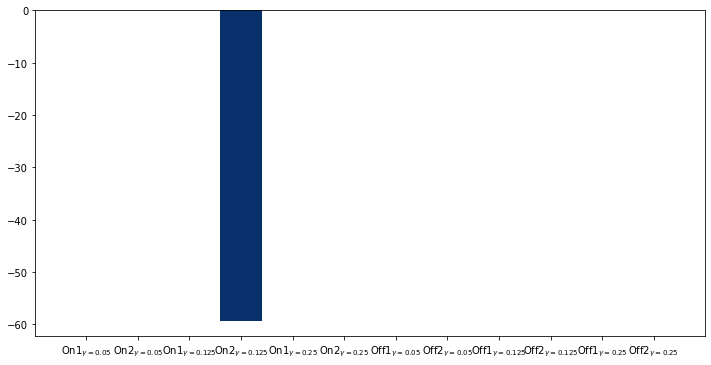

In [37]:
bar_color = type_colors["Flexibles"]
### plot power deviations for dev_Cf[7]
for i in range(len(dev_Q_list)):
    print(f"Plotting deviations for model: {Q_up_list[i]}")
    print(dev_Q_list[i])
    plt.figure(figsize=(12, 6))
    plt.bar(
        Deviators,
        dev_Q_list[i],  # Index 6 corresponds to Cf_12 (7th in the list)
        color=bar_color
    )

Plotting deviations for model: 400.0
[1.02141599 1.02141599 1.02141599 1.02141599 1.02141599 1.02141599
 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345]
Plotting deviations for model: 480.0
[1.02141599 1.02141599 1.02141599 1.02141599 1.02141599 1.02141599
 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345]
Plotting deviations for model: 560.0
[1.02141599 1.02141599 1.02141599 1.02141599 1.02141599 1.02141599
 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345]
Plotting deviations for model: 640.0
[1.02141599 1.02141599 1.02141599 1.02141599 1.02141599 1.02141599
 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345 1.43703345]
Plotting deviations for model: [720.0]
[-3.10878636 -3.10878636 -3.10878636 -3.10878636 -3.10878636 -3.10878636
 -3.2427642  -3.2427642  -3.2427642  -3.2427642  -3.2427642  -3.2427642 ]
Plotting deviations for model: [800.0]
[-2.44498813 -3.1873584  -2.44498813 -3.1873584  -3.1873584  -3.1873584
 -3.41164892 -3

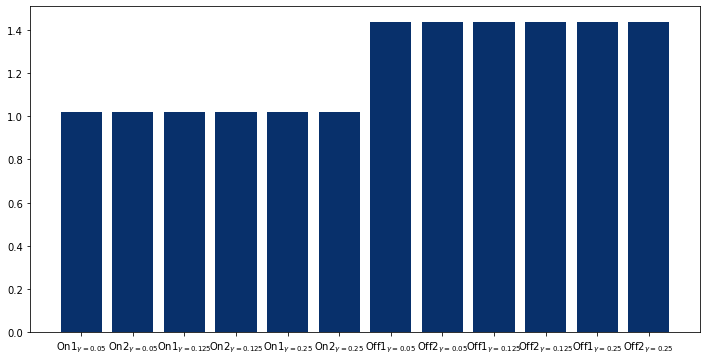

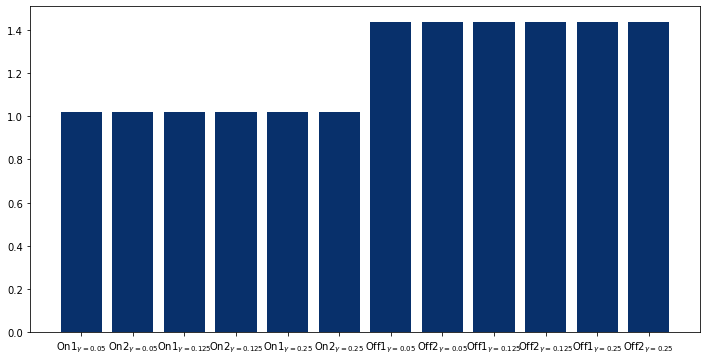

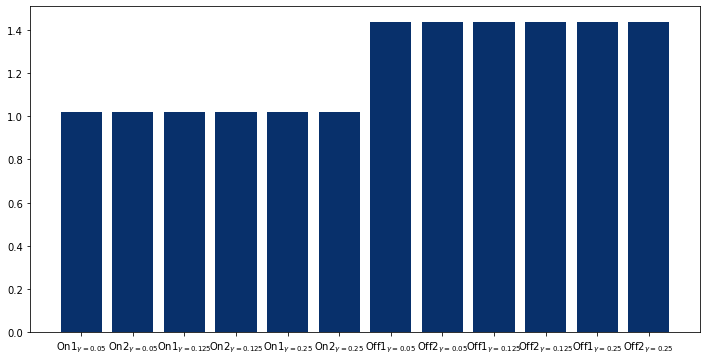

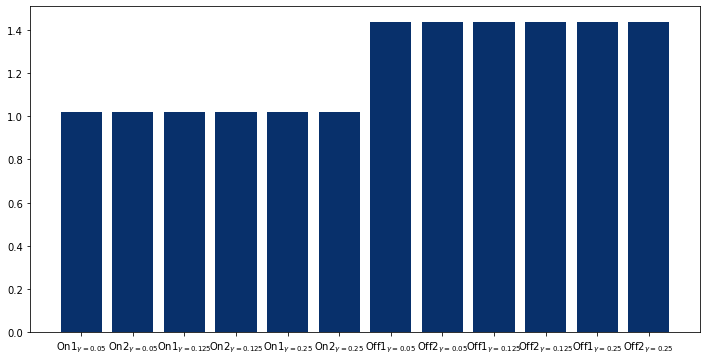

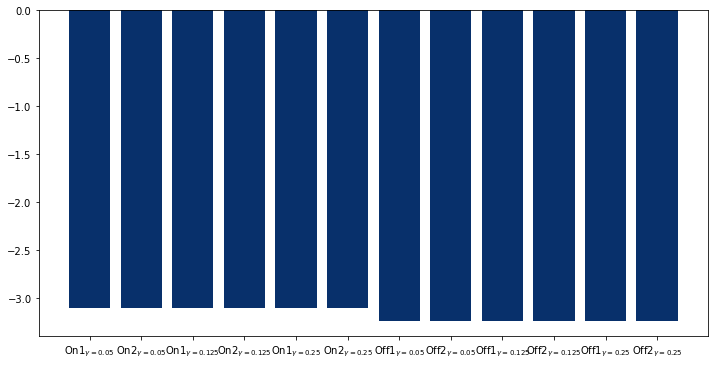

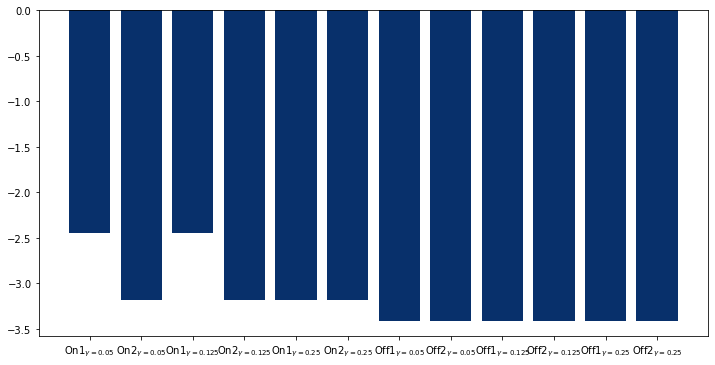

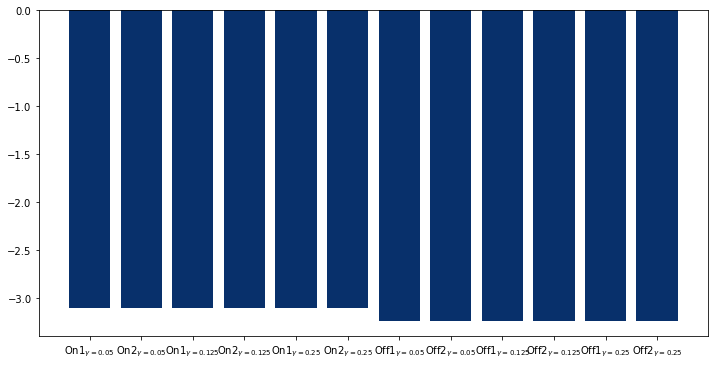

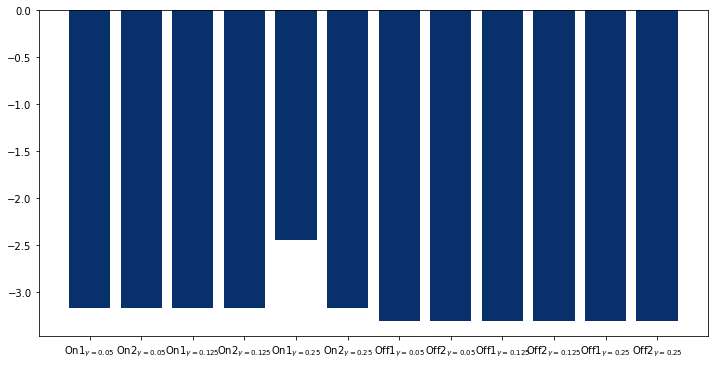

In [38]:
bar_color = type_colors["Flexibles"]
### plot power deviations for dev_Cf[7]
for i in range(len(dev_Q_list_k)):
    print(f"Plotting deviations for model: {Q_up_list_k[i]}")
    print(dev_Q_list_k[i])
    plt.figure(figsize=(12, 6))
    plt.bar(
        Deviators,
        dev_Q_list_k[i],  # Index 6 corresponds to Cf_12 (7th in the list)
        color=bar_color
    )

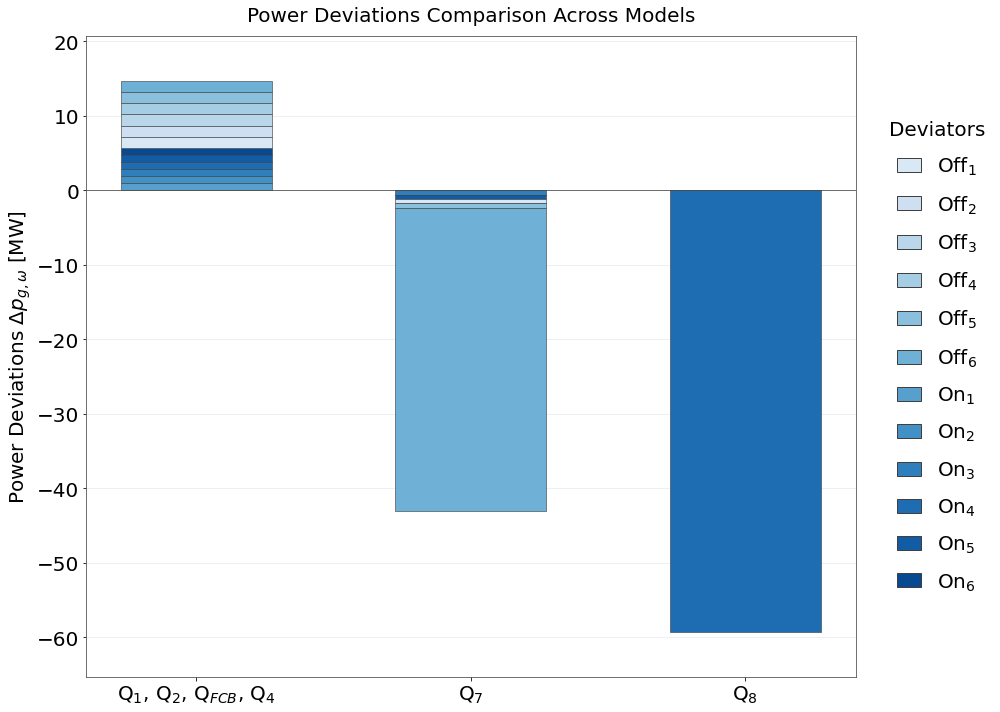

In [54]:
B_bids = pf.plot_power_deviations_grouped(
    model_names=model_names_Cf,
    deviations_list=dev_Q_list,
    polluters=Deviators_reg,
    base_color="Blues",      # Możesz zmienić na "Reds", "Greens" itd.
    figsize=(14, 10),         # Rozmiar zgodny z Twoimi preferencjami
    legend_title="Deviators", # Tytuł legendy
    title_fontsize=20,
    label_fontsize=20,
    tick_fontsize=20,
    legend_fontsize=20,
    legend_title_fontsize=20,
)
B_bids.savefig("Plots/B_bids_Cf_models_comparison.pdf", bbox_inches='tight')

for the last 3 models, we have lower Q_up than Q_down, that's why the deviations are negative

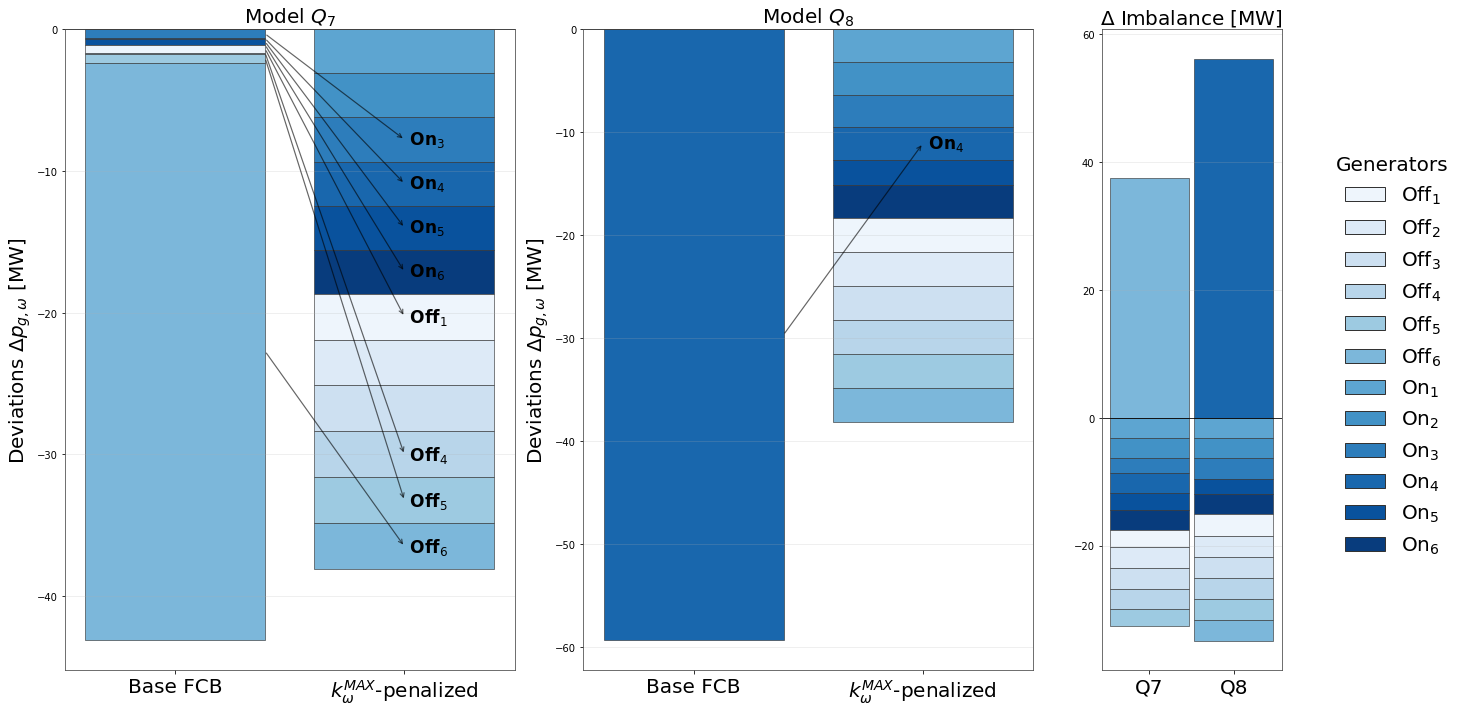

In [ ]:
fig = pf.plot_power_deviations_multi_models(
    polluters=Deviators_reg,
    deviations_base=dev_Q_list, 
    deviations_kpen=dev_Q_list_k, 
    figsize=(18, 10),
    # geometry
    bar_width=0.55,
    x_step=0.70,

    # fonts
    title_fontsize=20,
    label_fontsize=20,
    tick_fontsize=20,
    legend_fontsize=20,
    legend_title_fontsize=20,

    # styling
    grid_alpha=0.25,
    separator_color="0.2",     # gray separators
    separator_lw=0.6,
)

#fig
fig.savefig(f"../Figures/Results/Cf_Sensitivity/Power_deviations_Cf_models_comparison.pdf", dpi=300)

In [50]:
np.round(np.sum(DA_bids_Q["Q$_8$"]["Deviators"]) - np.sum(DA_bids_Q_k["Q$_8$"]["Deviators"]))

0.0

In [52]:
np.round(DA_bids_Q["Q$_7$"]["Deviators"])

array([ 34.,  34.,  35.,  34.,  35.,  34.,  55.,  54.,  54.,  54.,  56.,
       100.])

In [51]:
np.round(DA_bids_Q["Q$_8$"]["Deviators"])

array([ 20.,  34.,  34., 100.,  34.,  34.,  54.,  54.,  54.,  54.,  54.,
        54.])

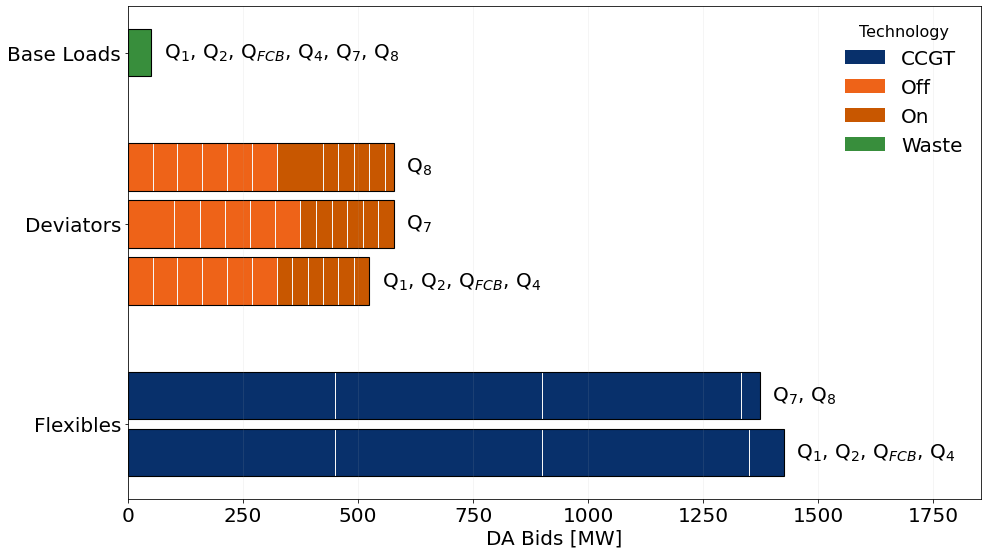

Traceback (most recent call last):
  File "c:\Users\Julia\anaconda3\lib\site-packages\IPython\core\completer.py", line 2056, in _complete
    for m in matcher(text)])
  File "c:\Users\Julia\anaconda3\lib\site-packages\IPython\core\completer.py", line 1444, in python_matches
    matches = self.global_matches(text)
  File "c:\Users\Julia\anaconda3\lib\site-packages\IPython\core\completer.py", line 682, in global_matches
    shortened = {"_".join([sub[0] for sub in word.split('_')]) : word
  File "c:\Users\Julia\anaconda3\lib\site-packages\IPython\core\completer.py", line 682, in <dictcomp>
    shortened = {"_".join([sub[0] for sub in word.split('_')]) : word
RuntimeError: dictionary changed size during iteration


In [ ]:
DA_comparison = pf.plot_DA_bids_grouped_identical(
    DA_bids_Q,
    types_to_plot=["Deviators", "Flexibles", "Base loads"],
    names_by_type=names_by_type_reg,
    tech_colors=Tech_colors_reg,
    sep_lw = 1.0,
    bar_height=0.5,
    sep_color = "#f7f7f7",
       # very light gray instead of white
    title_fontsize=20,
    label_fontsize=20,
    tick_fontsize=20,
    legend_fontsize=20,
    legend_title_fontsize=20,
    figsize=(14,8)
)


DA_comparison.savefig(f"../Figures/Results/Cf_Sensitivity/DA_bids_Cf_models_comparison.pdf", dpi=300)

### CHeck profits and system costs 

In [ ]:
for f in range(3):
    print(len(R_Cf_GDCA_k[4]["profits"]["reg_out"][f]))
    print(len(R_Cf_GDCA_k[4]["profits"]["reg_out_ind"][f]))
    print(len(R_Cf_GDCA_k[4]["profits"]["reg_out_bin"][f]))

10
9
9
10
9
9
10
9
9


In [ ]:
def profits_model(model, keep, n_models, ):
   
    profit_dev_bin = {}
    profit_dev_ind = {}
    profit_dev_LP = {}

    profit_flex_bin = {}
    profit_flex_ind = {}
    profit_flex_LP = {}

    profit_reg_ind = {}
    profit_reg_bin = {}
    profit_reg_LP = {}

    profit_dev_BM = {}
    profit_flex_BM = {}
    profit_reg_BM = {}

    for i in  range(1,n_models+1):
        # --- POLLUTERS ---
        dev_ind = []
        dev_bin = []
        dev_LP = []
        flex_ind = []
        flex_bin = []
        flex_LP = []
        reg_ind = []
        reg_bin = []
        reg_LP = []
        reg_BM = []
        dev_BM =[]
        flex_BM = []

        fold = keep[0]

        #if model == R_Cf_GDCA_k and i == 4:
           # fold = 5
    
        for j in range(12):
            row_ind = model[i]["profits"]["pol_out_ind"][j][fold]
            row_bin = model[i]["profits"]["pol_out_bin"][j][fold]
            row_LP = model[i]["profits"]["pol_out"][j][fold]
            row_LP_BM = model[i]["profits"]["pol_out"][j][fold]
            #@Logika: [Base, DA, Penalty_sum (3+4)]
            dev_ind.append([row_ind[0], row_ind[1], row_ind[2], row_ind[3]])
            dev_bin.append([row_bin[0], row_bin[1], row_bin[2], row_bin[3]])
            dev_LP.append([row_LP[0], row_LP[1], row_LP[2], row_LP[3]])
            dev_BM.append([row_LP_BM[0], row_LP_BM[1], row_LP_BM[2], row_LP_BM[3]])
            
        profit_dev_ind[i] = np.array(dev_ind)
        profit_dev_bin[i] = np.array(dev_bin)
        profit_dev_LP[i] = np.array(dev_LP)
        profit_dev_BM[i] = np.array(dev_BM)
        # --- FLEXIBLES ---
        for j in range(8):
            row_ind = model[i]["profits"]["flex_out_ind"][j][fold]
            row_bin = model[i]["profits"]["flex_out_bin"][j][fold]
            row_LP = model[i]["profits"]["flex_out"][j][fold]
            row_LP_BM = model[i]["profits"]["flex_out"][j][fold]
            # Logika: [Base, DA, Penalty_sum (3+4)]
            flex_ind.append([row_ind[0], row_ind[1], row_ind[2] ])
            flex_bin.append([row_bin[0], row_bin[1], row_bin[2]])
            flex_LP.append([row_LP[0], row_LP[1], row_LP[2] ])
            flex_BM.append([row_LP_BM[0], row_LP_BM[1], row_LP_BM[2] ])
        profit_flex_ind[i] = np.array(flex_ind)
        profit_flex_bin[i] = np.array(flex_bin)
        profit_flex_LP[i] = np.array(flex_LP)   
        profit_flex_BM[i] = np.array(flex_BM)

        for j in range(3):
            row_ind = model[i]["profits"]["reg_out_ind"][j][fold]
            row_bin = model[i]["profits"]["reg_out_bin"][j][fold]
            row_LP = model[i]["profits"]["reg_out"][j][fold]
            row_LP_BM = model[i]["profits"]["reg_out"][j][fold]
            reg_ind.append([row_ind[0]])
            reg_bin.append([row_bin[0]])
            reg_LP.append([row_LP[0]])
            reg_BM.append([row_LP_BM[0]])
        profit_reg_ind[i] = np.array(reg_ind)
        profit_reg_bin[i] = np.array(reg_bin)
        profit_reg_LP[i] = np.array(reg_LP)
        profit_reg_BM[i] = np.array(reg_BM)

    return (profit_dev_ind, profit_dev_bin, profit_dev_LP, profit_dev_BM,
            profit_flex_ind, profit_flex_bin, profit_flex_LP, profit_flex_BM,
            profit_reg_ind, profit_reg_bin, profit_reg_LP, profit_reg_BM)

In [ ]:
profit_dev_ind, profit_dev_bin, profit_dev_LP, profit_dev_BM, profit_flex_ind, profit_flex_bin, profit_flex_LP, profit_flex_BM, profit_reg_ind, profit_reg_bin, profit_reg_LP, profit_reg_BM = profits_model(R_Cf_GDCA, keep, n_models_us)
profit_dev_ind_k, profit_dev_bin_k, profit_dev_LP_k, profit_dev_BM_k, profit_flex_ind_k, profit_flex_bin_k, profit_flex_LP_k, profit_flex_BM_k, profit_reg_ind_k, profit_reg_bin_k, profit_reg_LP_k, profit_reg_BM_k = profits_model(R_Cf_GDCA_k, keep, n_models_k)

In [ ]:
print(profit_dev_LP)

{1: array([[2388.44      ,  130.10305919,   -5.02317837,   -8.24417366],
       [2388.44      ,  130.10305919,   -5.02317837,   -8.24417366],
       [2388.44      ,  130.10305919,   -5.02317837,   -8.24417366],
       [2388.44      ,  130.10305919,   -5.02317837,   -8.24417366],
       [2388.44      ,  130.10305919,   -5.02317837,   -8.24417366],
       [2388.44      ,  130.10305919,   -5.02317837,   -8.24417366],
       [3686.67      ,  201.11426413,   -7.93964039,  -13.2373655 ],
       [3686.67      ,  201.11426413,   -7.93964039,  -13.2373655 ],
       [3686.67      ,  201.11426413,   -7.93964039,  -13.2373655 ],
       [3686.67      ,  201.11426413,   -7.93964039,  -13.2373655 ],
       [3686.67      ,  201.11426413,   -7.93964039,  -13.2373655 ],
       [3686.67      ,  201.11426413,   -7.93964039,  -13.2373655 ]]), 2: array([[2388.44      ,  130.10305919,   -6.02781404,  -16.48834733],
       [2388.44      ,  130.10305919,   -6.02781404,  -16.48834733],
       [2388.44      ,  1

In [ ]:
for i in range(1,n_models_us + 1):
    print(f"Profits summary for model {i}:")
    print(f"Model {i} Deviators Bin:, LP, Ind")
    print(np.round(np.sum(profit_dev_bin[i], axis=1)))
    print(np.round(np.sum(profit_dev_LP[i], axis=1)))
    print(np.round(np.sum(profit_dev_ind[i], axis=1))) #summing across rows
    print(np.round(np.sum(profit_dev_bin[i], axis=1)) - np.round(np.sum(profit_dev_LP[i], axis=1)))


    
    

Profits summary for model 1:
Model 1 Deviators Bin:, LP, Ind
[2505. 2505. 2505. 2505. 2505. 2505. 3867. 3867. 3867. 3867. 3867. 3867.]
[2505. 2505. 2505. 2505. 2505. 2505. 3867. 3867. 3867. 3867. 3867. 3867.]
[2505. 2505. 2505. 2505. 2505. 2505. 3867. 3867. 3867. 3867. 3867. 3867.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Profits summary for model 2:
Model 2 Deviators Bin:, LP, Ind
[2496. 2496. 2496. 2496. 2496. 2496. 3852. 3852. 3852. 3852. 3852. 3852.]
[2496. 2496. 2496. 2496. 2496. 2496. 3852. 3852. 3852. 3852. 3852. 3852.]
[2496. 2496. 2496. 2496. 2496. 2496. 3852. 3852. 3852. 3852. 3852. 3852.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Profits summary for model 3:
Model 3 Deviators Bin:, LP, Ind
[2487. 2487. 2487. 2487. 2487. 2487. 3837. 3837. 3837. 3837. 3837. 3837.]
[2487. 2487. 2487. 2487. 2487. 2487. 3837. 3837. 3837. 3837. 3837. 3837.]
[2487. 2487. 2487. 2487. 2487. 2487. 3837. 3837. 3837. 3837. 3837. 3837.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Profits summary for model 4:
Model 4 

In [ ]:
for i in range(1,n_models_k + 1):
    print(f"Profits summary for model {i}:")
    print(f"Model {i} Deviators Bin:, LP, Ind")
    print(np.round(np.sum(profit_dev_bin_k[i], axis=1)))
    print(np.round(np.sum(profit_dev_LP_k[i], axis=1)))
    print(np.round(np.sum(profit_dev_ind_k[i], axis=1))) #summing across rows
    print(np.round(np.sum(profit_dev_bin_k[i], axis=1)) - np.round(np.sum(profit_dev_LP_k[i], axis=1)))


    
    

Profits summary for model 1:
Model 1 Deviators Bin:, LP, Ind
[2506. 2506. 2506. 2506. 2506. 2506. 3866. 3866. 3866. 3866. 3866. 3866.]
[2506. 2506. 2506. 2506. 2506. 2506. 3866. 3866. 3866. 3866. 3866. 3866.]
[2506. 2506. 2506. 2506. 2506. 2506. 3866. 3866. 3866. 3866. 3866. 3866.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Profits summary for model 2:
Model 2 Deviators Bin:, LP, Ind
[2496. 2496. 2496. 2496. 2496. 2496. 3852. 3852. 3852. 3852. 3852. 3852.]
[2496. 2496. 2496. 2496. 2496. 2496. 3852. 3852. 3852. 3852. 3852. 3852.]
[2496. 2496. 2496. 2496. 2496. 2496. 3852. 3852. 3852. 3852. 3852. 3852.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Profits summary for model 3:
Model 3 Deviators Bin:, LP, Ind
[2487. 2487. 2487. 2487. 2487. 2487. 3837. 3837. 3837. 3837. 3837. 3837.]
[2487. 2487. 2487. 2487. 2487. 2487. 3837. 3837. 3837. 3837. 3837. 3837.]
[2487. 2487. 2487. 2487. 2487. 2487. 3837. 3837. 3837. 3837. 3837. 3837.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Profits summary for model 4:
Model 4 

In [ ]:
for i in range(1,n_models_us + 1):
    print(f"Profits summary for model {i}:")
    print(f"Model {i} Deviators Bin:, LP, Ind")
    print(np.round(np.mean(np.sum(profit_dev_bin[i][:6], axis=1))), np.round(np.std(np.sum(profit_dev_bin[i][:6], axis=1))), 
          np.round(np.mean(np.sum(profit_dev_LP[i][:6], axis=1))), np.round(np.std(np.sum(profit_dev_LP[i][:6], axis=1))), 
          np.round(np.mean(np.sum(profit_dev_ind[i][:6], axis=1))), np.round(np.std(np.sum(profit_dev_ind[i][:6], axis=1)))) #summing across rows
    print(np.round(np.mean(np.sum(profit_dev_bin[i][6:], axis=1))), np.round(np.std(np.sum(profit_dev_bin[i][6:], axis=1))),
          np.round(np.mean(np.sum(profit_dev_LP[i][6:], axis=1))), np.round(np.std(np.sum(profit_dev_LP[i][6:], axis=1))),
          np.round(np.mean(np.sum(profit_dev_ind[i][6:], axis=1))), np.round(np.std(np.sum(profit_dev_ind[i][6:], axis=1)))) #summing across rows

    
    

Profits summary for model 1:
Model 1 Deviators Bin:, LP, Ind
2505.0 0.0 2505.0 0.0 2505.0 0.0
3867.0 0.0 3867.0 0.0 3867.0 0.0
Profits summary for model 2:
Model 2 Deviators Bin:, LP, Ind
2496.0 0.0 2496.0 0.0 2496.0 0.0
3852.0 0.0 3852.0 0.0 3852.0 0.0
Profits summary for model 3:
Model 3 Deviators Bin:, LP, Ind
2487.0 0.0 2487.0 0.0 2487.0 0.0
3837.0 0.0 3837.0 0.0 3837.0 0.0
Profits summary for model 4:
Model 4 Deviators Bin:, LP, Ind
2478.0 0.0 2478.0 0.0 2478.0 0.0
3822.0 0.0 3822.0 0.0 3822.0 0.0
Profits summary for model 5:
Model 5 Deviators Bin:, LP, Ind
2500.0 4.0 2498.0 0.0 2498.0 0.0
3751.0 227.0 3753.0 228.0 3753.0 228.0
Profits summary for model 6:
Model 6 Deviators Bin:, LP, Ind
2374.0 768.0 2374.0 265.0 2374.0 265.0
3861.0 0.0 3861.0 0.0 3861.0 0.0


In [ ]:
for i in range(1,n_models_k+1):
    print(f"Profits summary for model {i}:")
    print(f"Model {i} Deviators Bin, LP and Ind:")
    print(np.round(np.mean(np.sum(profit_dev_bin_k[i][:6], axis=1))), np.round(np.std(np.sum(profit_dev_bin_k[i][:6], axis=1))), np.round(np.mean(np.sum(profit_dev_LP_k[i][:6], axis=1))), np.round(np.std(np.sum(profit_dev_LP_k[i][:6], axis=1))), np.round(np.mean(np.sum(profit_dev_ind_k[i][:6], axis=1))), np.round(np.std(np.sum(profit_dev_ind_k[i][:6], axis=1)))
          ) #summing across rows
    print(np.round(np.mean(np.sum(profit_dev_bin_k[i][6:], axis=1))), np.round(np.std(np.sum(profit_dev_bin_k[i][6:], axis=1))), np.round(np.mean(np.sum(profit_dev_LP_k[i][6:], axis=1))), np.round(np.std(np.sum(profit_dev_LP_k[i][6:], axis=1))), np.round(np.mean(np.sum(profit_dev_ind_k[i][6:], axis=1))), np.round(np.std(np.sum(profit_dev_ind_k[i][6:], axis=1)))) #summing across rows

    
    
    #print(np.round(np.sum(profit_dev_LP_k[i], axis=1))) #summing across rows


    #print(np.round(np.sum(profit_dev_bin_k[i], axis=1))) #summing across rows
    #print(np.round(np.sum(profit_dev_ind_k[i], axis=1) - np.sum(profit_dev_LP_k[i], axis=1)))
    #print(np.round(np.sum(profit_dev_bin_k[i], axis=1) - np.sum(profit_dev_LP_k[i], axis=1)))

Profits summary for model 1:
Model 1 Deviators Bin, LP and Ind:
2506.0 0.0 2506.0 0.0 2506.0 0.0
3866.0 0.0 3866.0 0.0 3866.0 0.0
Profits summary for model 2:
Model 2 Deviators Bin, LP and Ind:
2496.0 0.0 2496.0 0.0 2496.0 0.0
3852.0 0.0 3852.0 0.0 3852.0 0.0
Profits summary for model 3:
Model 3 Deviators Bin, LP and Ind:
2487.0 0.0 2487.0 0.0 2487.0 0.0
3837.0 0.0 3837.0 0.0 3837.0 0.0
Profits summary for model 4:
Model 4 Deviators Bin, LP and Ind:
2477.0 0.0 2477.0 0.0 2477.0 0.0
3823.0 0.0 3823.0 0.0 3823.0 0.0
Profits summary for model 5:
Model 5 Deviators Bin, LP and Ind:
2461.0 0.0 2461.0 0.0 2461.0 0.0
3822.0 0.0 3822.0 0.0 3822.0 0.0
Profits summary for model 6:
Model 6 Deviators Bin, LP and Ind:
2456.0 9.0 2456.0 9.0 2456.0 9.0
3811.0 0.0 3811.0 0.0 3811.0 0.0
Profits summary for model 7:
Model 7 Deviators Bin, LP and Ind:
2448.0 0.0 2448.0 0.0 2448.0 0.0
3803.0 0.0 3803.0 0.0 3803.0 0.0
Profits summary for model 8:
Model 8 Deviators Bin, LP and Ind:
2442.0 7.0 2442.0 7.0 2442

In [ ]:
np.sum(np.sum(profit_dev_LP_k[1], axis=1))

38231.29779237538

In [ ]:
for i in range(1,n_models_k+1):
    print(f"Profits summary for model {i}:")
    if i <= 4:
        print(f"Summed profit for k and our model:")
        print(np.round(np.sum(np.sum(profit_dev_bin_k[i], axis=1))),np.round(np.sum(np.sum(profit_dev_bin[i], axis=1))) ) #summing across rows
        print(np.round(np.sum(np.sum(profit_dev_LP_k[i], axis=1)))),np.round(np.sum(np.sum(profit_dev_LP[i], axis=1)))  #summing across rows
        print(np.round(np.sum(np.sum(profit_dev_ind_k[i], axis=1))),np.round(np.sum(np.sum(profit_dev_ind[i], axis=1))) ) #summing across rows
       
    elif i in [5,6]:
        print(f"Summed profit for k and our model:")
        print(np.round(np.sum(np.sum(profit_dev_bin_k[i], axis=1)))) #summing across rows
        print(np.round(np.sum(np.sum(profit_dev_LP_k[i], axis=1)))) #summing across rows
        print(np.round(np.sum(np.sum(profit_dev_ind_k[i], axis=1)))) #summing across rows
    else:
        print(np.round(np.sum(np.sum(profit_dev_bin_k[i], axis=1))),np.round(np.sum(np.sum(profit_dev_bin[i-2], axis=1))) ) #summing across rows
        print(np.round(np.sum(np.sum(profit_dev_LP_k[i], axis=1)))),np.round(np.sum(np.sum(profit_dev_LP[i-2], axis=1)))  #summing across rows
        print(np.round(np.sum(np.sum(profit_dev_ind_k[i], axis=1))),np.round(np.sum(np.sum(profit_dev_ind[i-2], axis=1))) ) #summing across rows
        
        


Profits summary for model 1:
Summed profit for k and our model:
38231.0 38231.0
38231.0
38231.0 38231.0
Profits summary for model 2:
Summed profit for k and our model:
38087.0 38087.0
38087.0
38087.0 38087.0
Profits summary for model 3:
Summed profit for k and our model:
37942.0 37942.0
37942.0
37942.0 37942.0
Profits summary for model 4:
Summed profit for k and our model:
37798.0 37798.0
37798.0
37798.0 37798.0
Profits summary for model 5:
Summed profit for k and our model:
37701.0
37701.0
37701.0
Profits summary for model 6:
Summed profit for k and our model:
37603.0
37603.0
37603.0
Profits summary for model 7:
37506.0 37506.0
37506.0
37506.0 37506.0
Profits summary for model 8:
37409.0 37409.0
37409.0
37409.0 37409.0


In [ ]:
R_Cf_GDCA_k[1]["history"]["history_insample"][0]['h'][1]['obj']

In [ ]:
print(data_Cf_10["GDCA"])

Any[(profits = (pol_in = [[2663.5649999999905, -166.70670520230354, -52.411413379768426, -0.0] [2660.0149999999912, -145.69106613967588, -44.78184380997754, -5.052328694515065] [2690.835454545455, -149.26620746061383, -49.004832586622385, -0.0] [2682.735, -201.62115155131286, -48.426903396551936, -0.0] [2696.225, -163.91316917670696, -48.23112475024355, -0.0] [2679.1849999999968, -141.43171970685398, -58.0911188916131, -0.0] [2681.3150000000455, -220.5814283594314, -59.39368601294796, -0.0] [2683.09, -171.31033106621317, -41.152256493645424, -5.966667017614139] [2676.7000000000107, -181.8550239234547, -52.478577504988074, -0.0] [2734.5649999999337, -168.06261553979886, -56.82321497220106, -0.0]; [2663.5649999999905, -166.70670520230354, -52.411413379768426, -0.0] [2660.0149999999912, -145.69106613967588, -44.78184380997754, -5.052328694515065] [2690.835454545455, -149.26620746061383, -49.004832586622385, -0.0] [2682.735, -201.62115155131286, -48.426903396551936, -0.0] [2696.225, -163.9

In [ ]:
print(np.round(R_Cf_GDCA[4]["bids"]["B_flex_down_out"]))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [30. 30. 27. 28. 29. 25. 24. 30. 29. 16.]
 [11. 11.  9.  9. 10.  7.  6. 10.  9.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [ ]:
for i in range(1,n_models_us+1):
    print(f"Profits summary for model {i}:")
    print(f"Model {i} Flexibles Bin:")
    print(np.round(np.mean(np.sum(profit_flex_bin[i][:4], axis=1))), np.round(np.std(np.sum(profit_flex_bin[i][:4], axis=1)))) #summing across rows
    print(np.round(np.mean(np.sum(profit_flex_bin[i][4:], axis=1))), np.round(np.std(np.sum(profit_flex_bin[i][4:], axis=1)))) #summing across rows
    print(f"Model {i} Flexibles LP:")
    print(np.round(np.mean(np.sum(profit_flex_LP[i][:4], axis=1))), np.round(np.std(np.sum(profit_flex_LP[i][:4], axis=1)))) #summing across rows
    print(np.round(np.mean(np.sum(profit_flex_LP[i][4:], axis=1))), np.round(np.std(np.sum(profit_flex_LP[i][4:], axis=1)))) #summing across rows
    #print(np.round(np.sum(profit_dev_ind[i], axis=1))) #summing across rows
    #calculate mean for first 6 elements (Deviators)
    print(f"Model {i} Flexibles Ind:")
    print(np.round(np.mean(np.sum(profit_flex_ind[i][:4], axis=1))), np.round(np.std(np.sum(profit_flex_ind[i][:4], axis=1)))) #summing across rows
    print(np.round(np.mean(np.sum(profit_flex_ind[i][4:], axis=1))), np.round(np.std(np.sum(profit_flex_ind[i][4:], axis=1)))) #summing across rows
    
    
    #print(np.round(np.sum(profit_dev_LP_k[i], axis=1))) #summing across rows


    #print(np.round(np.sum(profit_dev_bin_k[i], axis=1))) #summing across rows
    #print(np.round(np.sum(profit_dev_ind_k[i], axis=1) - np.sum(profit_dev_LP_k[i], axis=1)))
    #print(np.round(np.sum(profit_dev_bin_k[i], axis=1) - np.sum(profit_dev_LP_k[i], axis=1)))

Profits summary for model 1:
Model 1 Flexibles Bin:
0.0 0.0
50.0 0.0
Model 1 Flexibles LP:
0.0 0.0
50.0 0.0
Model 1 Flexibles Ind:
0.0 0.0
50.0 0.0
Profits summary for model 2:
Model 2 Flexibles Bin:
0.0 0.0
50.0 0.0
Model 2 Flexibles LP:
0.0 0.0
50.0 0.0
Model 2 Flexibles Ind:
0.0 0.0
50.0 0.0
Profits summary for model 3:
Model 3 Flexibles Bin:
0.0 0.0
50.0 0.0
Model 3 Flexibles LP:
0.0 0.0
50.0 0.0
Model 3 Flexibles Ind:
0.0 0.0
50.0 0.0
Profits summary for model 4:
Model 4 Flexibles Bin:
0.0 0.0
50.0 0.0
Model 4 Flexibles LP:
0.0 0.0
50.0 0.0
Model 4 Flexibles Ind:
0.0 0.0
50.0 0.0
Profits summary for model 5:
Model 5 Flexibles Bin:
0.0 0.0
50.0 0.0
Model 5 Flexibles LP:
0.0 0.0
50.0 0.0
Model 5 Flexibles Ind:
0.0 0.0
50.0 0.0
Profits summary for model 6:
Model 6 Flexibles Bin:
0.0 0.0
50.0 0.0
Model 6 Flexibles LP:
0.0 0.0
50.0 0.0
Model 6 Flexibles Ind:
0.0 0.0
50.0 0.0


In [ ]:
pBIN_dev_binQ = {i: np.column_stack([profit_dev_LP[i][:, 0] ,profit_dev_LP[i][:, 1] , profit_dev_LP[i][:, 2]+  profit_dev_LP[i][:, 3]] ) for i in range(1,n_models_us+1)}
pBM_dev_Q ={i: np.column_stack([profit_dev_BM[i][:, 0] ,profit_dev_BM[i][:, 1] , profit_dev_BM[i][:, 2]+  profit_dev_BM[i][:, 3]] ) for i in range(1,n_models_us+1)}
bench_dev = pBIN_dev_binQ[3]  # FCB
models_by_name_dev = {
    "Q1": pBIN_dev_binQ[1],
    "Q2": pBIN_dev_binQ[2],
    "Q4": pBIN_dev_binQ[4],
    "Q7": pBIN_dev_binQ[5],
    "Q8": pBIN_dev_binQ[6],
      # your note: Q7 comes from run_idx 6
}

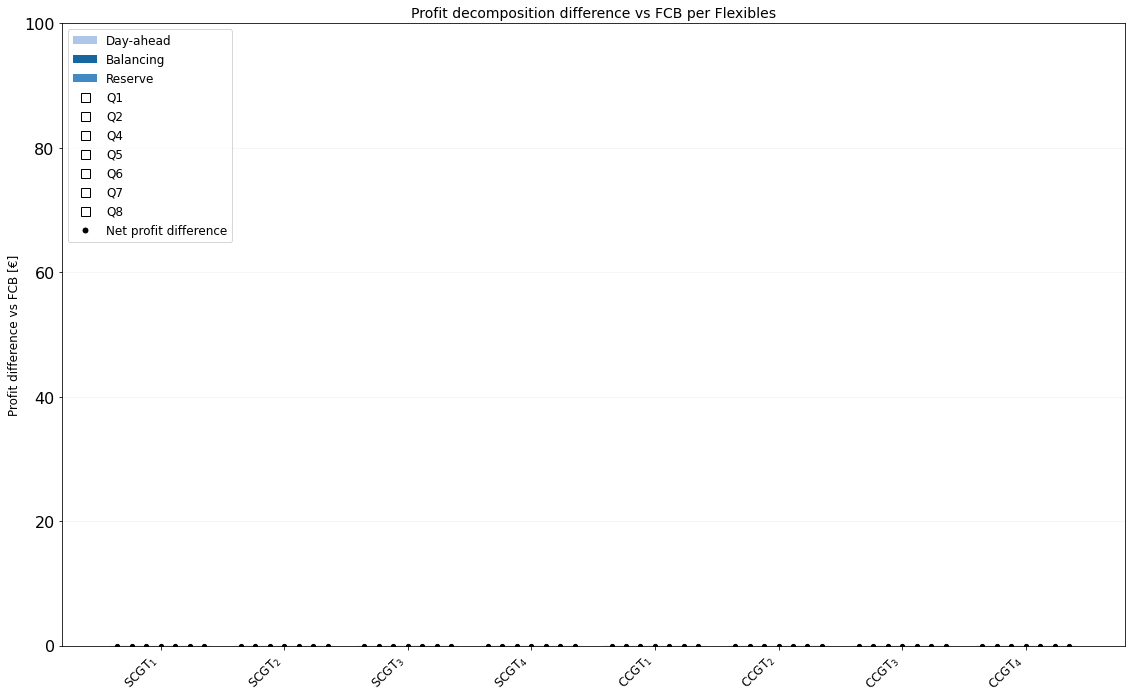

In [ ]:
pBIN_flex_binQ_k = {i: np.column_stack([profit_flex_LP_k[i][:, 0] ,profit_flex_LP_k[i][:, 1] , profit_flex_LP_k[i][:, 2]] ) for i in range(1,n_models_k+1)}
pBM_flex_Q_k ={i: np.column_stack([profit_flex_BM_k[i][:, 0] ,profit_flex_BM_k[i][:, 1] , profit_flex_BM_k[i][:, 2]] ) for i in range(1,n_models_k+1)}
bench_flex_k = pBIN_flex_binQ_k[3]  # FCB
models_by_name_flex_k = {
    "Q1": pBIN_flex_binQ_k[1],
    "Q2": pBIN_flex_binQ_k[2],
    "Q4": pBIN_flex_binQ_k[4],
    "Q5": pBIN_flex_binQ_k[5],
    "Q6": pBIN_flex_binQ_k[6],
    "Q7": pBIN_flex_binQ_k[7],
    "Q8": pBIN_flex_binQ_k[5],      # your note: Q7 comes from run_idx 6
}


pf.stacked_posneg_diff_matrix_grouped(
    bench=bench_flex_k,
    models_by_name=models_by_name_flex_k,
    bench_name="FCB",
    compare_order=["Q1", "Q2", "Q4","Q5", "Q6", "Q7", "Q8"],
    participants=Flexibles,           # length 12
    markets= markets_f,   # length 2 (matches your pBIN_pol columns)
    participant_type="Flexibles",
    figsize=(16, 10),
    ylim=(-0, 100),
    sep_edgecolor="#f2f2f2",
    sep_lw=0.4,
    annotate_net=False
)


They start behaving whack, seeing how there is no real difference between On 1-6 and Off 1-6. Everyone is just getting a random value.

In [ ]:
import re

def to_float(x):
    if isinstance(x, (int, float)):
        return float(x)
    if hasattr(x, "__len__") and not isinstance(x, (str, bytes)):
        # e.g. numpy array / list / julia vector-like
        return float(x[0])
    if isinstance(x, str):
        nums = re.findall(r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?", x)
        if not nums:
            raise ValueError(f"Can't parse float from: {x!r}")
        return float(nums[-1])  # take the last number shown
    return float(x)

Q_up_list   = [to_float(x) for x in Q_up_list]
Q_down_list = [to_float(x) for x in Q_down_list]

Q_up_list_k   = [to_float(x) for x in Q_up_list_k]
Q_down_list_k = [to_float(x) for x in Q_down_list_k]

In [ ]:
pBIN_pen_pol_k = {i: np.column_stack([profit_dev_bin_k[i][:, 2] , profit_dev_bin_k[i][:, 3]] ) for i in range(1,n_models_k+1)}
# Convert range to list, then add the extra IDs
# The labels you want in the plot
thesis_labels = [1, 2, 3, 4, 7, 8]
# The actual indices (1-6) where the data is stored
data_indices = range(1, 7) 

# Pair them up: (1,1), (2,2), (3,3), (4,4), (7,5), (8,6)
pBIN_pen_pol = {
    i: np.column_stack([profit_dev_bin[j][:, 2], profit_dev_bin[j][:, 3]]) 
    for i, j in zip(thesis_labels, data_indices)
}

Q_up_base = {label: val for label, val in zip(thesis_labels, Q_up_list)}
Q_down_base = {label: val for label, val in zip(thesis_labels, Q_down_list)}

In [ ]:
def plot_cost_comparison_base_vs_kpen(
    pBIN_base, pBIN_k,         
    Q_up_base, Q_up_k,         
    Q_down_base, Q_down_k,     
    approach_groups,           
    figsize=(16, 9),
    base_color="#113C87",      # Softened Slate Blue
    penalized_color="#f27c1d",  # Softened Deep Orange
    social_color="#c0c0c0",    # Muted Silver
    separator_color="0.3",     
    separator_lw=0.8,
    grid_alpha=0.2,
    title_fontsize=16,
    label_fontsize=14,
    tick_fontsize=13
):
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
    fig.patch.set_facecolor("white")
    
    bar_width = 0.6
    group_spacing = 0.5 

    def _get_source(group_name):
        name_lower = group_name.lower()
        if any(x in name_lower for x in ["penalty", "k", "k-"]):
            return pBIN_k, Q_up_k, Q_down_k, penalized_color
        return pBIN_base, Q_up_base, Q_down_base, base_color

    def _get_grouped_data(approach_models, col_idx, current_pBIN, current_Q_dict):
        unique_splits = {}
        for m in approach_models:
            try:
                Q = float(current_Q_dict.get(m, 0)) if isinstance(current_Q_dict, dict) else float(current_Q_dict[m-1])
            except (IndexError, KeyError): continue
            if Q <= 0 or m not in current_pBIN: continue
            
            mat = np.asarray(current_pBIN[m], dtype=float)
            total_indiv_sum = np.sum(np.abs(mat[:, col_idx]))
            recovery_pct = round(total_indiv_sum / Q * 100, 1)
            
            if recovery_pct not in unique_splits:
                unique_splits[recovery_pct] = {"models": [], "pct": recovery_pct}
            unique_splits[recovery_pct]["models"].append(m)
        return list(unique_splits.values())

    def _format_label(m_list):
        # Explicit LaTeX formatting with $ delimiters to ensure proper rendering
        def clean(m): return r"Q_{\text{FCB}}" if m == 3 else rf"Q_{{{m}}}"
        m_list = sorted(m_list)
        if len(m_list) > 2 and all(m_list[i]+1 == m_list[i+1] for i in range(len(m_list)-1)):
            return rf"$({clean(m_list[0])} \text{{-}} {clean(m_list[-1])})$"
        return rf"$({', '.join([clean(m) for m in m_list])})$"

    def _draw_side(ax, col_idx, title):
        ax.set_facecolor("white")
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(0.8)
            spine.set_color("0.3")

        all_bars_pcts, all_bars_colors, x_labels, x_pos = [], [], [], []
        curr_x = 0
        
        for i, group in enumerate(approach_groups):
            src_pBIN, src_Qup, src_Qdn, group_color = _get_source(group["name"])
            src_Q = src_Qup if col_idx == 0 else src_Qdn
            grouped_splits = _get_grouped_data(group["models"], col_idx, src_pBIN, src_Q)
            
            for split in grouped_splits:
                all_bars_pcts.append(split["pct"])
                all_bars_colors.append(group_color)
                x_labels.append(_format_label(split["models"]))
                x_pos.append(curr_x)
                curr_x += 1
            
            if i % 2 == 1: curr_x += group_spacing

        # Draw Bars
        ax.bar(x_pos, all_bars_pcts, color=all_bars_colors, 
               edgecolor=separator_color, linewidth=separator_lw, width=bar_width, zorder=3)
        
        social_heights = [max(100 - p, 0) for p in all_bars_pcts]
        ax.bar(x_pos, social_heights, bottom=all_bars_pcts, color=social_color, 
               edgecolor=separator_color, linewidth=separator_lw, width=bar_width, alpha=0.7, zorder=3)

        # Labels with Path Effects
        for i, sh in enumerate(social_heights):
            txt = ax.text(x_pos[i], 102, f"Socialized\n{sh:.1f}%", ha='center', va='bottom', 
                          fontsize=tick_fontsize-4,color="#000000")
            txt.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])

        ax.set_title(title, fontsize=title_fontsize, pad=10 )
        ax.set_xticks(x_pos)
        ax.set_xticklabels(x_labels, fontsize=tick_fontsize)
        ax.set_ylim(0, 120)
        ax.grid(axis='y', alpha=grid_alpha, zorder=0)

    _draw_side(axes[0], 0, "Up-regulation procurement cost split")
    _draw_side(axes[1], 1, "Down-regulation procurement cost split")

    axes[0].set_ylabel("Cost Allocation Percentage [%]", fontsize=label_fontsize)

    # Legend
    legend_elements = [
        Patch(facecolor=base_color, edgecolor=separator_color, label='Base FCB Approach'),
        Patch(facecolor=penalized_color, edgecolor=separator_color, label=r'$k_{\omega}^{MAX}$-Penalized Approach'),
        Patch(facecolor=social_color, alpha=0.7, edgecolor=separator_color, label='Socialized Cost')
    ]
    axes[1].legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5), 
                   frameon=False, fontsize=tick_fontsize)

    plt.tight_layout()
    return fig

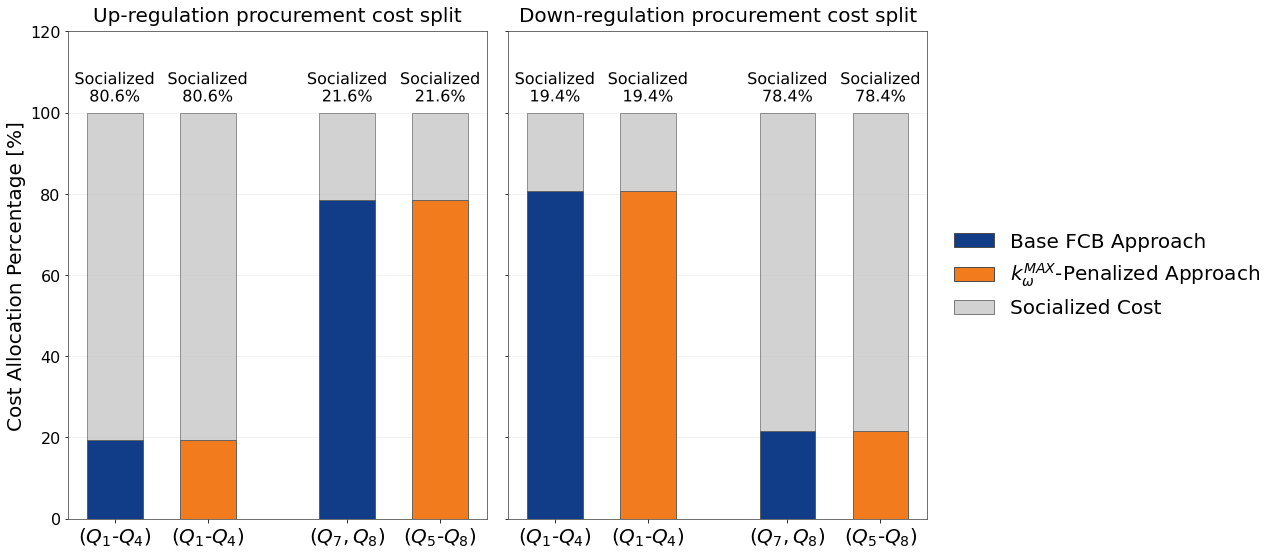

In [ ]:
# Use the dictionaries you already have
# Force alternating order in the list
approach_groups = [
    {"name": "Base", "models": [1, 2, 3, 4]},     # First bar
    {"name": "k-pen", "models": [1, 2, 3, 4]},    # Second bar
    {"name": "Base", "models": [7, 8]},           # Third bar
    {"name": "k-pen", "models": [5, 6, 7, 8]}        # Fourth bar
]

fig = plot_cost_comparison_base_vs_kpen(
    pBIN_base=pBIN_pen_pol,    # Your first dict
    pBIN_k=pBIN_pen_pol_k,      # Your second dict
    Q_up_base=Q_up_base,       # Base totals from your logs
    Q_up_k=Q_up_list_k, 
    Q_down_base = Q_down_base,            # Base totals from your logs
    Q_down_k = Q_down_list_k,            # k-pen totals from your logs
    approach_groups=approach_groups,
    figsize=(18, 8),
    title_fontsize=20,
    label_fontsize=20,
    tick_fontsize=20
)
fig.savefig(f"../Figures/Results/Cf_Sensitivity/procurement_cost_comparison_Cf.pdf", dpi=300)

### BigQ sensitivity 

Finding the folds that did not converge to not include them later on in the analysis 

In [ ]:
data_bigQ

Dict{String, Any} with 7 entries:
  "GDCA"            => (profits = (pol_in = [[2325.96, 169.372, -0.0, -59.828] …
  "penalty"         => 1000
  "q_down"          => 480.0
  "BM"              => (profits = (pol_in = [[2325.96, 169.372, -0.0, -0.0] [23…
  "iter_bin_all"    => [12, 102, 35, 103, 50, 61, 434, 6, 60, 4]
  "iter_bin_LP_all" => [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
  "q_up"            => 560.0

In [ ]:
data_bigQ_GDCA = nt_to_dict(data_bigQ["GDCA"])

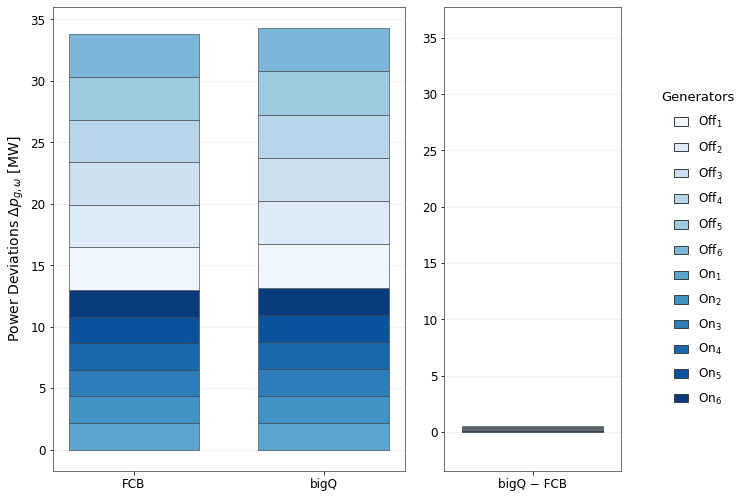

In [ ]:
deviations_list_bigQ = [
    np.asarray(data_bin["aggregates"]["mean_pol_bids_out"]).ravel(),
    np.asarray(data_bigQ_GDCA["aggregates"]["mean_pol_bids_out"]).ravel(),
    #np.asarray(data_bin_bigQ["aggregates"]["mean_pol_bids_out"]).ravel(),
]

diff = pf.plot_power_deviations_models(
    model_names=["FCB", "bigQ"],
    deviations_list=deviations_list_bigQ, # Added the name
    polluters=Deviators_reg,  
    show_arrows = False
            # Added the name
)

Hmmmm, so no difference in the 2 models apparently. 

In [ ]:
avg_proft_bin = np.zeros((12, 4))
avg_proft_bigQ = np.zeros((12, 4))

for i in range(12):
    selected_vectors_bin = []
    selected_vectors_bigQ = []
    for j in keep:
        vec_bin = np.array(data_bin["profits"]["pol_out"][i, j])
        selected_vectors_bin.append(vec_bin)
        vec_bigQ = np.array(data_bigQ_GDCA["profits"]["pol_out"][i, j])
        selected_vectors_bigQ.append(vec_bigQ)

    avg_proft_bin[i, :] = np.mean(selected_vectors_bin, axis=0)
    avg_proft_bigQ[i, :] = np.mean(selected_vectors_bigQ, axis=0)

print("Final Matrix Shape:", avg_proft_bin.shape)

Final Matrix Shape: (12, 4)


In [ ]:
pBIN_profit_stacked = np.column_stack([avg_proft_bin[:, 0], avg_proft_bin[:, 1], avg_proft_bin[:, 2] + avg_proft_bin[:, 3]])
pbigQ_profit_stacked = np.column_stack([avg_proft_bigQ[:, 0], avg_proft_bigQ[:, 1], avg_proft_bigQ[:, 2] + avg_proft_bigQ[:, 3]])


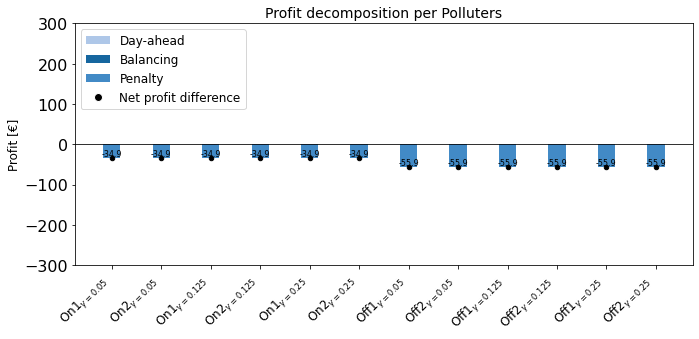

In [ ]:
pf.stacked_posneg_diff_matrix(pBIN_profit_stacked, pbigQ_profit_stacked, Deviators, markets_d, participant_type="Polluters",
                               figsize=(10,5), labelsize=12, titlesize=14, fontsize=12)

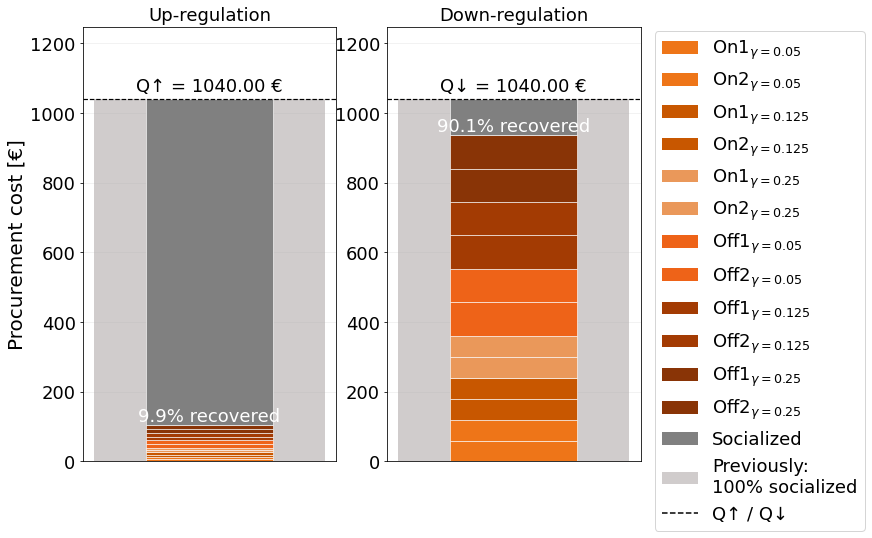

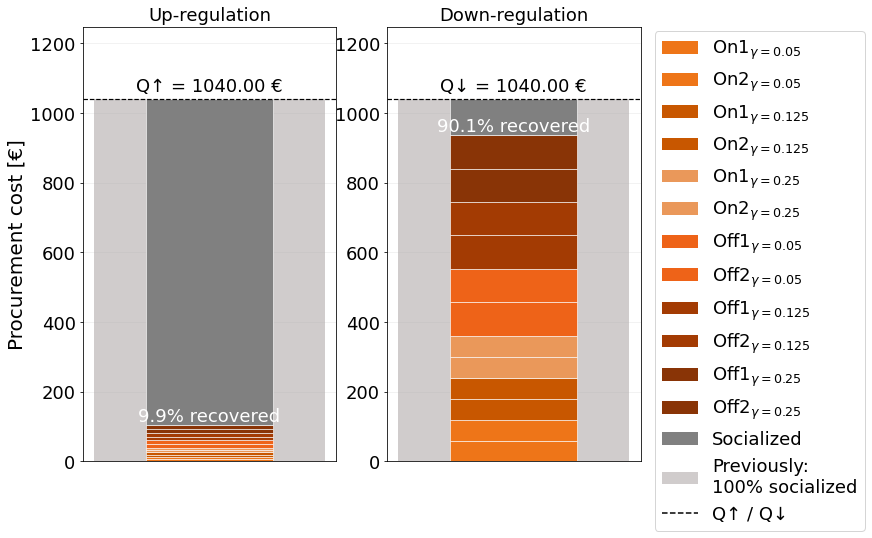

In [ ]:
pBIN_list = [
    data_bin["aggregates"]["pol_out_avg"], 
    data_bigQ_GDCA["aggregates"]["pol_out_avg"]
]#, data_bin_bigQ["aggregates"]["pol_out_avg"]]  # nP x ≥4 arrays


Q_up_list_bigQ = [q_up, q_up+q_down]
Q_down_list_bigQ = [q_down, q_down+q_up]
pf.plot_socialized_vs_individualized_FCB_only(
    pBIN_fcb=pBIN_list[1],      # assuming index 1 is FCB
    Q_up=Q_up_list_bigQ[1],
    Q_down=Q_down_list_bigQ[1],
    tech_colors=tech_colors,
    polluters=Deviators, 
    figsize=(10, 8),
    prev_social_color="#d0cccc",
    asy = True
)

So overall, it seems that our model does good enough job and the results are the same whether the q_up and q_down is different or the same. one odd thing is though, that they still all do the same exact thing. Maybe things would be different if we had deviators with different costs, compared to how we have only 2 price lvls - like we saw in the previous model, where we had more varied deviators and there were some betting against the system. 